# Web ML System

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder

from functions_ml import *
model_repo = ".\\Web_model\\"
file_path = '.\Files\\Web\\'

## Preprocessing data for binary classification (Web or Benign)

### Import basic datasets

In [2]:
train_sets, test_sets = get_train_and_test_files()
print(len(train_sets), len(test_sets))

X_columns = x_columns(read_csv_file(train_sets[0]))
y_column = 'label'

135 34


### Scaling

In [3]:
scaler = get_or_define_and_save_scaler(model_repo, train_sets, X_columns)

### Dictionnary for spliting data

In [3]:
dict_3_classes = {}
dict_3_classes['BrowserHijacking'] = 'Web'
dict_3_classes['Backdoor_Malware'] = 'Web'
dict_3_classes['XSS'] = 'Web'
dict_3_classes['Uploading_Attack'] = 'Web'
dict_3_classes['SqlInjection'] = 'Web'
dict_3_classes['CommandInjection'] = 'Web'

dict_3_classes['BenignTraffic'] = 'Benign'

dict_3_classes['DDoS-RSTFINFlood'] = 'Other'
dict_3_classes['DDoS-PSHACK_Flood'] = 'Other'
dict_3_classes['DDoS-SYN_Flood'] = 'Other'
dict_3_classes['DDoS-UDP_Flood'] = 'Other'
dict_3_classes['DDoS-TCP_Flood'] = 'Other'
dict_3_classes['DDoS-ICMP_Flood'] = 'Other'
dict_3_classes['DDoS-SynonymousIP_Flood'] = 'Other'
dict_3_classes['DDoS-ACK_Fragmentation'] = 'Other'
dict_3_classes['DDoS-UDP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-ICMP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-SlowLoris'] = 'Other'
dict_3_classes['DDoS-HTTP_Flood'] = 'Other'
dict_3_classes['DoS-UDP_Flood'] = 'Other'
dict_3_classes['DoS-SYN_Flood'] = 'Other'
dict_3_classes['DoS-TCP_Flood'] = 'Other'
dict_3_classes['DoS-HTTP_Flood'] = 'Other'
dict_3_classes['Mirai-greeth_flood'] = 'Other'
dict_3_classes['Mirai-greip_flood'] = 'Other'
dict_3_classes['Mirai-udpplain'] = 'Other'
dict_3_classes['DNS_Spoofing'] = 'Other'
dict_3_classes['MITM-ArpSpoofing'] = 'Other'
dict_3_classes['Recon-PingSweep'] = 'Other'
dict_3_classes['Recon-OSScan'] = 'Other'
dict_3_classes['Recon-PortScan'] = 'Other'
dict_3_classes['VulnerabilityScan'] = 'Other'
dict_3_classes['Recon-HostDiscovery'] = 'Other'
dict_3_classes['DictionaryBruteForce'] = 'Other'

### Refactoring data

In [17]:
train_sets.extend(test_sets)
refactor_dataframe(train_sets, dict_3_classes, file_path, y_column)

100%|██████████| 168/168 [03:20<00:00,  1.20s/it]


### Counting number of samples per class

4


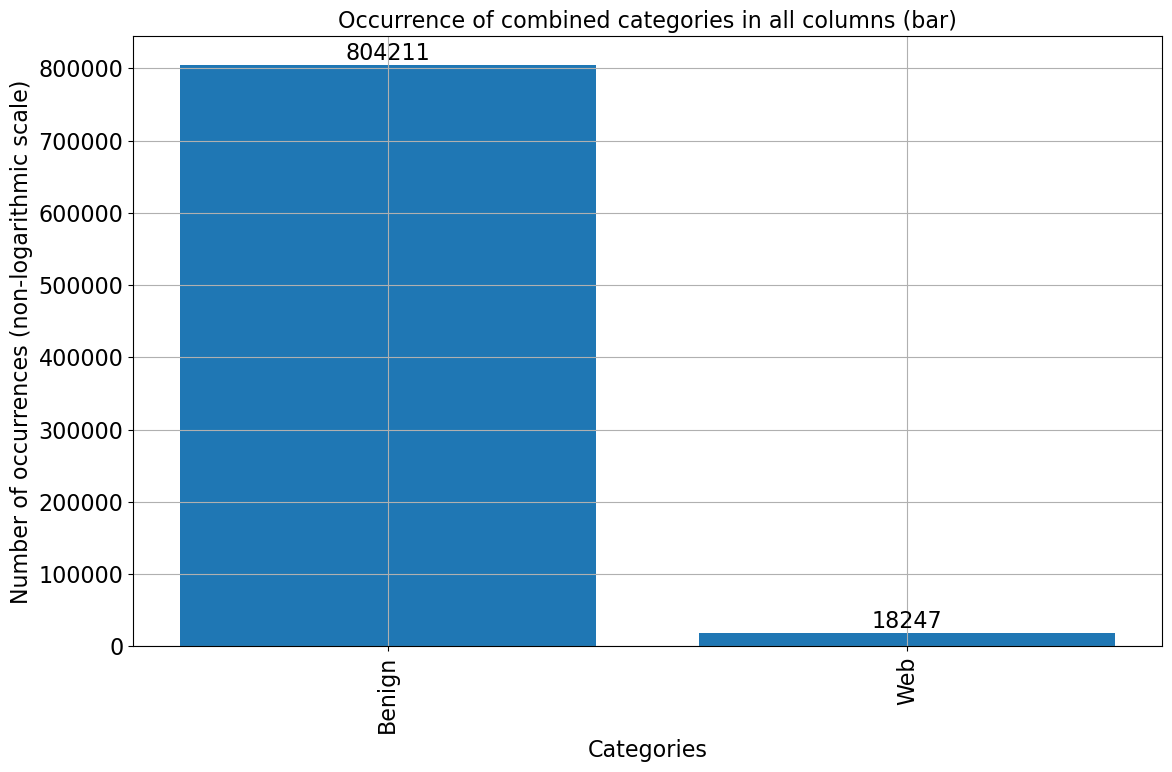

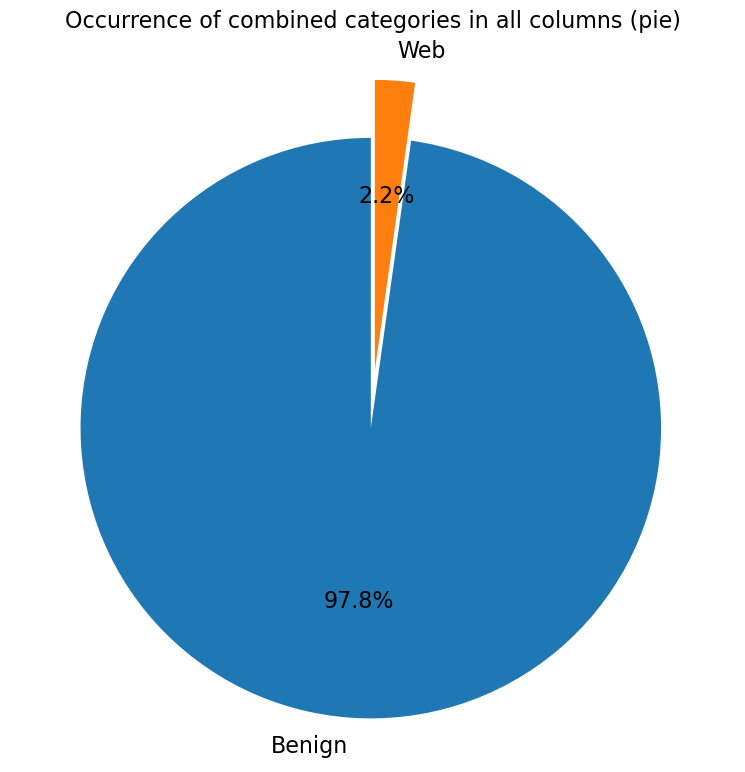

In [3]:
train_sets, test_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(train_sets) + len(test_sets))

plot_bar_chart(count_label(train_sets, file_path=file_path), 'Occurrence of combined categories in all columns (bar)', 'Categories', 'Number of occurrences', 12, 8, model_repo, log_scale=False)
plot_pie_chart(count_label(train_sets, file_path=file_path), 'Occurrence of combined categories in all columns (pie)', 12, 8, model_repo)

## Define variables

In [3]:
performance_path = 'performance.csv'
file_path = '.\Files\\Web\\'
model_path_binary = '.\\Web_model\\Binary\\'
local_path = '.\\Web_model\\'
model_path_all_classes = '.\\Web_model\\All_classes\\'
after_build_csv = 'after_build_set_scaled.csv'

# Get path data
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(build_sets) + len(after_build_sets))

# Get build datasets
build_nb = round(len(build_sets) * 0.8)
train_sets = build_sets[:build_nb]
# train_sets = train_sets[: round(len(train_sets) * 0.5)]
test_sets = build_sets[build_nb:]
# test_sets = test_sets[: round(len(test_sets) * 0.5)]

# Define different columns
X_columns = x_columns(read_csv_file(train_sets[0], path_to_datasets=file_path))
print(len(X_columns))
X_columns = X_columns[:-1]
y_column = 'label'
z_column = 'Binary'

4
47


## First model (Binary (Web or Benigh))

### Building model

In [8]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

In [ ]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Load selected X columns
selected_X = pd.read_csv(model_path_binary+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))

# Buidling models
plotConfusionMatrix = True
figsizeConfusionMatrix = (10, 5)
saveConfusionMatrix = False
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], 'SF_'+model['Name'], train_sets, test_sets, file_path, performance, model_path_binary+'SF_', X_columns=selected_X, y_column=z_column, encoder=encoder, scaler=scaler, \
                                                     confusionMatrix=plotConfusionMatrix, saving=saveConfusionMatrix, pathToSave=model_path_binary+'SF_'+model['Name'], figsize=figsizeConfusionMatrix)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

#### Complex models

In [6]:
complexModelsDitionnary = [
    {
        "Name": "Voting (Cat, XGB, RF)",
        "Model": VotingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            voting='soft')
    },
    {
        "Name": "Bagging (Cat)",
        "Model": BaggingClassifier(base_estimator=XGBClassifier(random_state = 42), n_estimators=15)
    },
    {
        "Name": "Stacking (Cat, XGB, RF)",
        "Model": StackingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            final_estimator=XGBClassifier(random_state = 42),
            cv=5)
    },
]

In [7]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Buidling models
for model in tqdm(complexModelsDitionnary):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_binary, X_columns=X_columns, y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

100%|██████████| 3/3 [32:56<00:00, 659.00s/it]


['.\\Web_model\\Binary\\encoder.joblib']

#### Feature Importance

In [5]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": joblib.load(model_path_binary+'model_DT.joblib')
    },
    {
        "Name": "RF",
        "Model": joblib.load(model_path_binary+'model_RF.joblib')
    },
    {
        "Name": "XGB",
        "Model": joblib.load(model_path_binary+'model_XGB.joblib')
    },
    {
        "Name": "Cat",
        "Model": joblib.load(model_path_binary+'model_Cat.joblib')
    },
    {
        "Name": "LIGHT",
        "Model": joblib.load(model_path_binary+'model_LIGHT.joblib')
    },
    {
        "Name": "GBoost",
        "Model": joblib.load(model_path_binary+'model_GBoost.joblib')
    },
    {
        "Name": "Adaboost",
        "Model": joblib.load(model_path_binary+'model_Adaboost.joblib')
    },
]

100%|██████████| 7/7 [00:00<00:00, 303.77it/s]


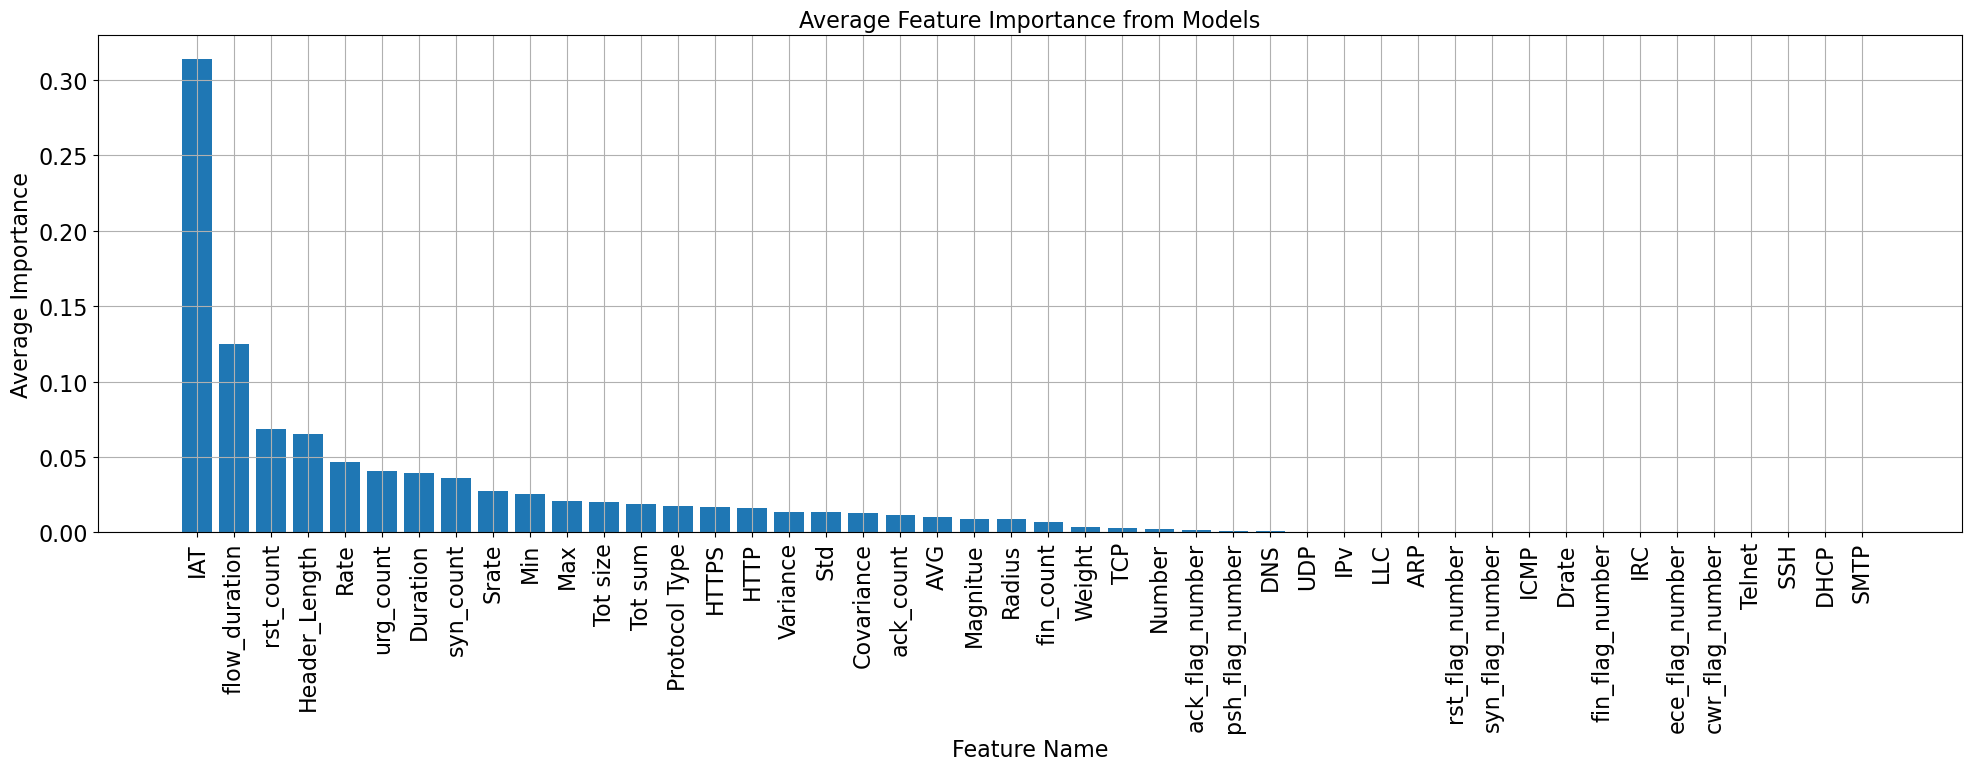

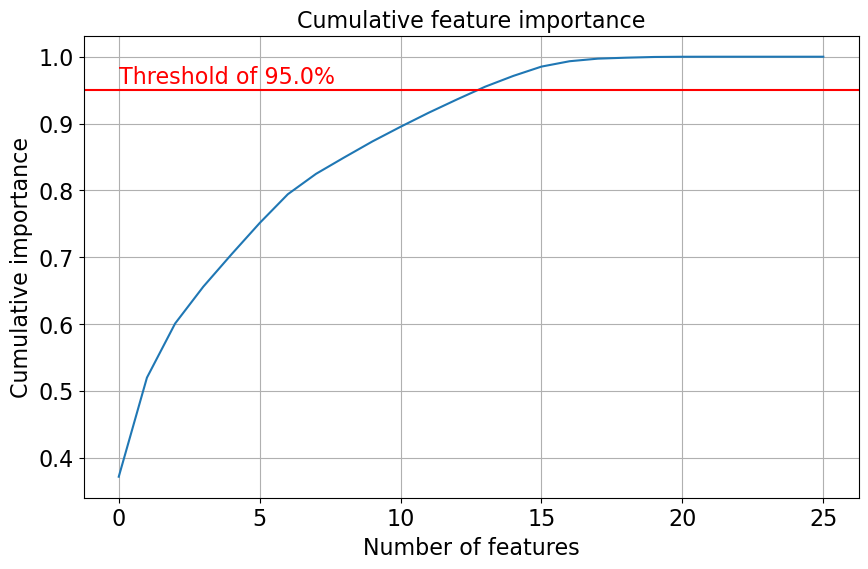

['IAT', 'flow_duration', 'rst_count', 'Rate', 'urg_count', 'Duration', 'syn_count', 'Min', 'Max', 'Tot size', 'Tot sum', 'Protocol Type', 'HTTPS']


100%|██████████| 2/2 [00:01<00:00,  1.31it/s]


In [6]:
# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, X_columns, model_path_binary, all_features=True, figsize=(20, 8))
average_importance_df.to_csv(model_path_binary+'feature_importance.csv', index=False)
average_importance_df.to_csv('.\\resultats\\Web\\Binary\\feature_importance.csv', index=False)

# Load feature importance dataframe
average_importance_df = pd.read_csv(model_path_binary+'feature_importance.csv')
# print(average_importance_df.head(average_importance_df.size))

# Remove features with correlation > 0.80
threshold = 0.80
features_with_threshold_corr = remove_features_with_correlation_and_feature_importance(read_csv_file(train_sets[0], file_path)[X_columns], average_importance_df, threshold=threshold)
# print(features_with_threshold_corr.head(features_with_threshold_corr.size))

# Select features with cumulative importance > 0.95 and correlation < 0.80
selected_X = select_features_by_importance(features_with_threshold_corr['Feature'].values, features_with_threshold_corr['Average Importance'].values, model_path_binary, threshold_percentage=0.95)
pd.DataFrame(selected_X).to_csv(model_path_binary+'selected_X_columns.csv', index=False)
print(selected_X)

# Define and fit scaler
scaler = MinMaxScaler()
for train_set in tqdm(train_sets):
    scaler.fit(read_csv_file(train_set, file_path)[selected_X])

##### Some plots

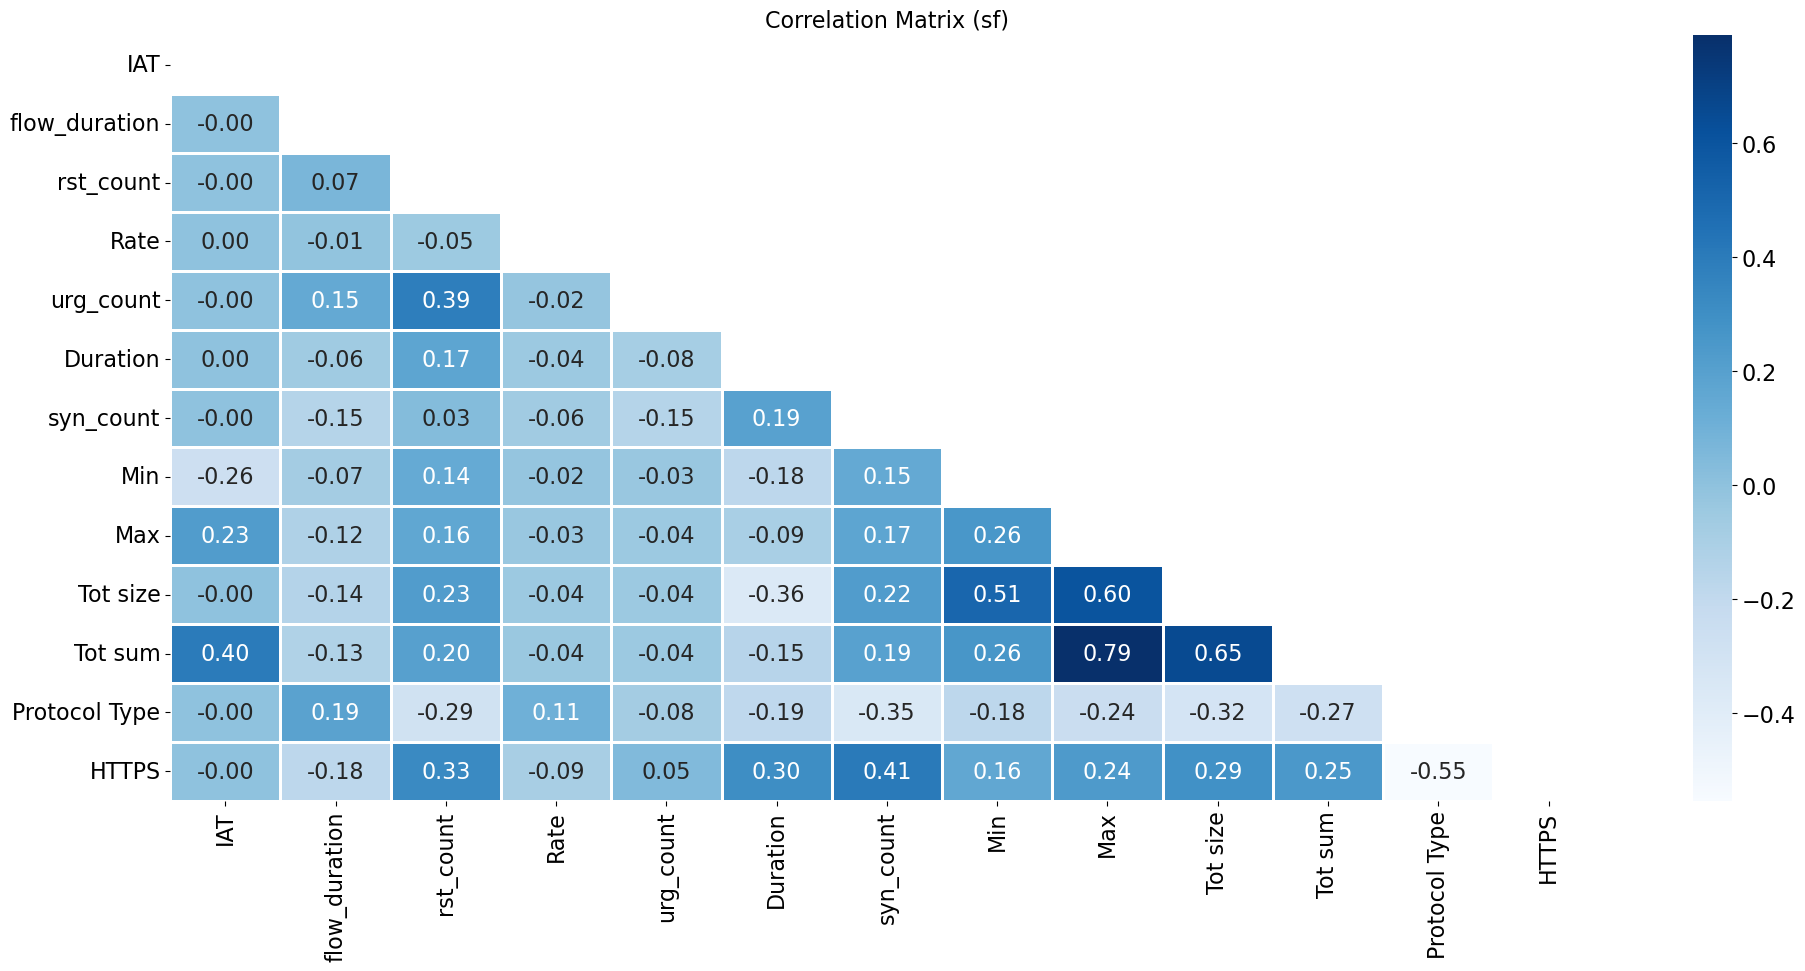

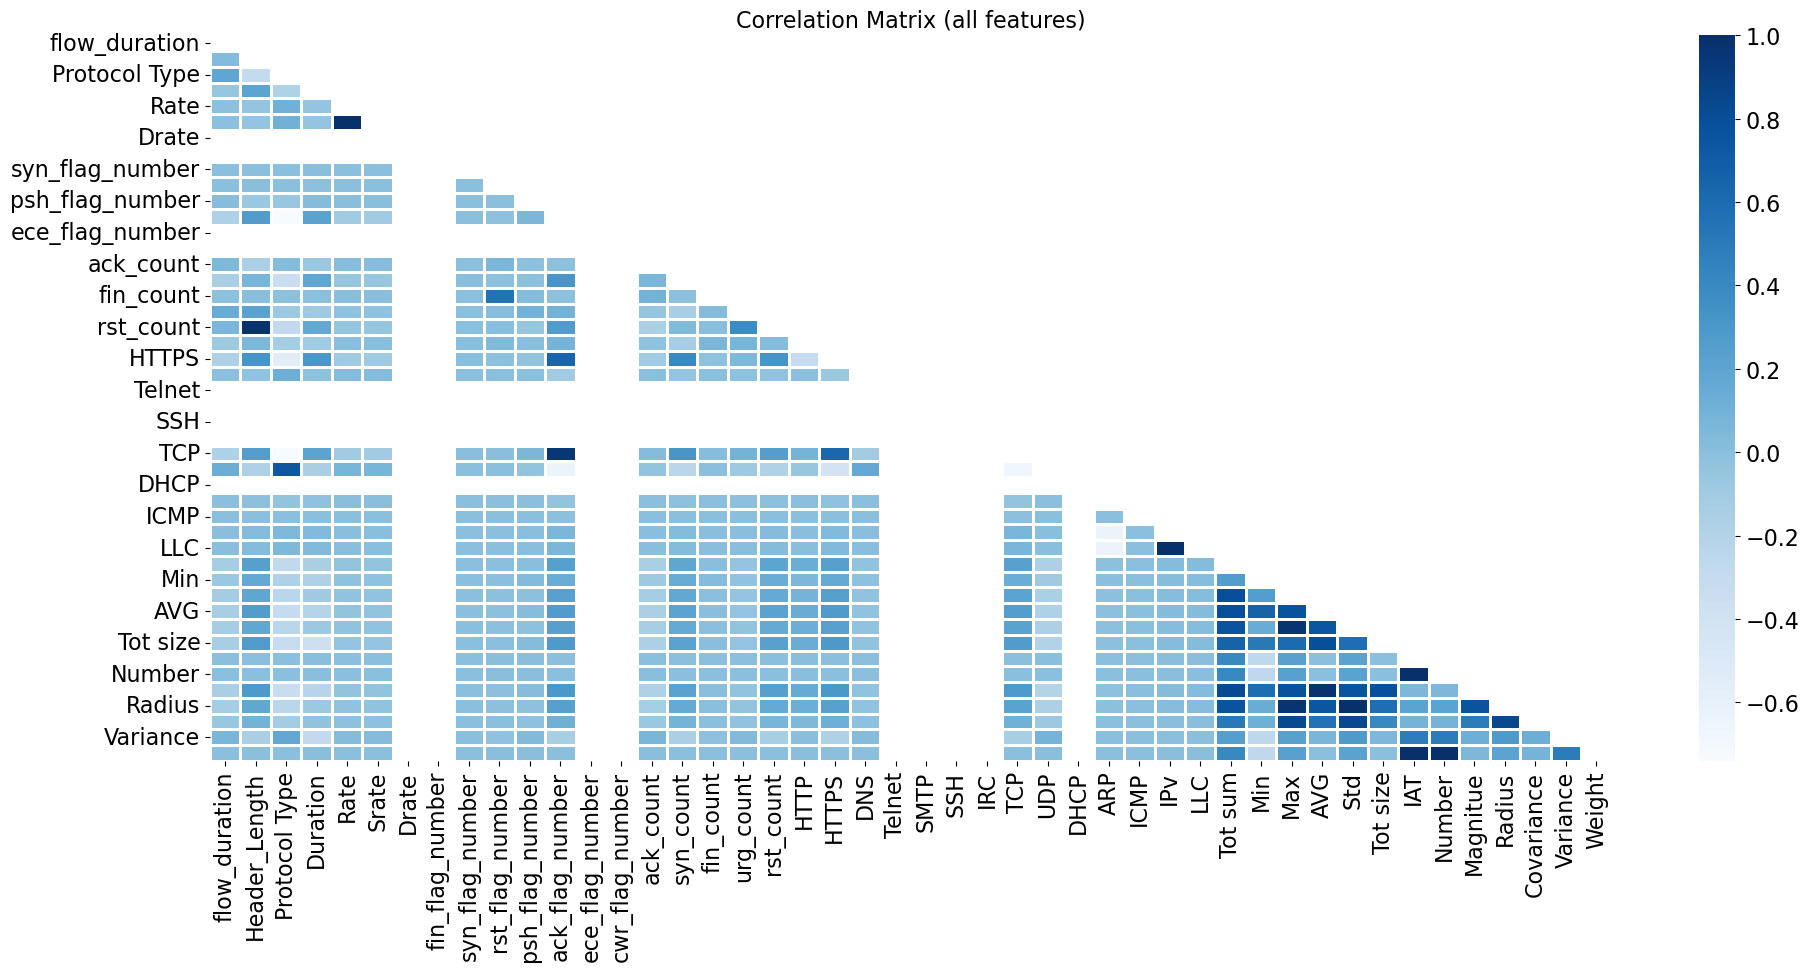

<Figure size 2000x1000 with 0 Axes>

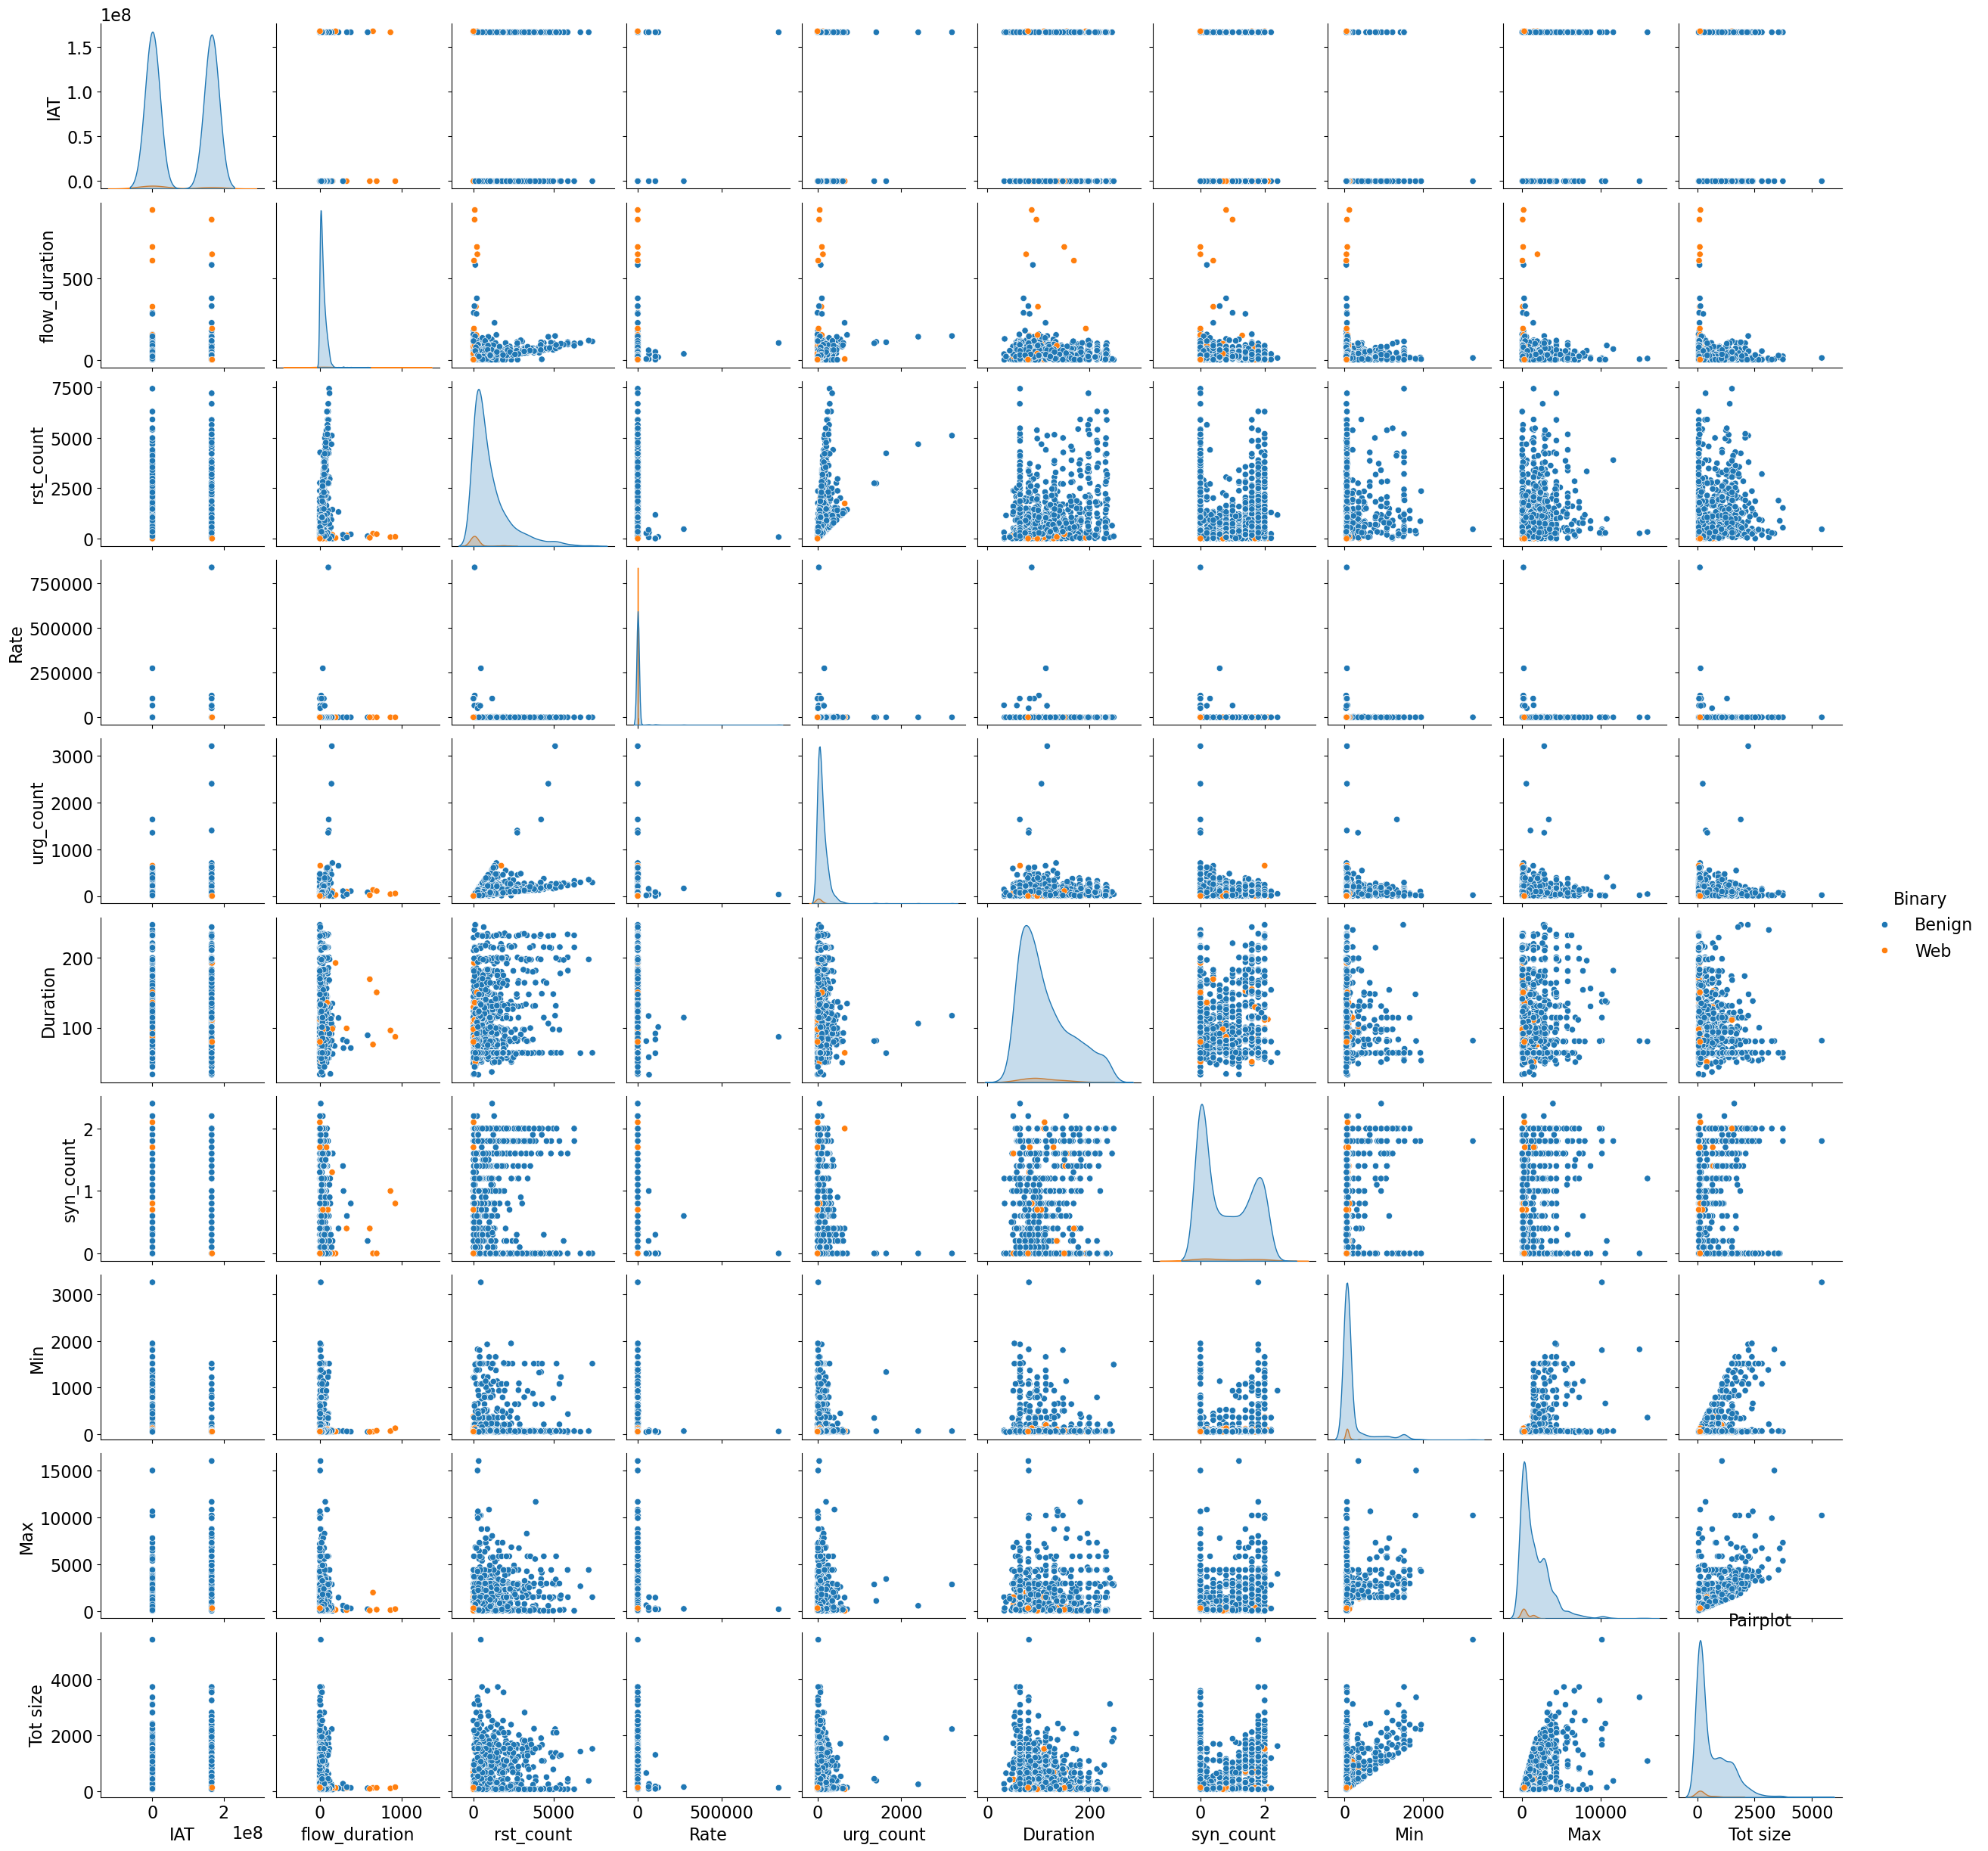

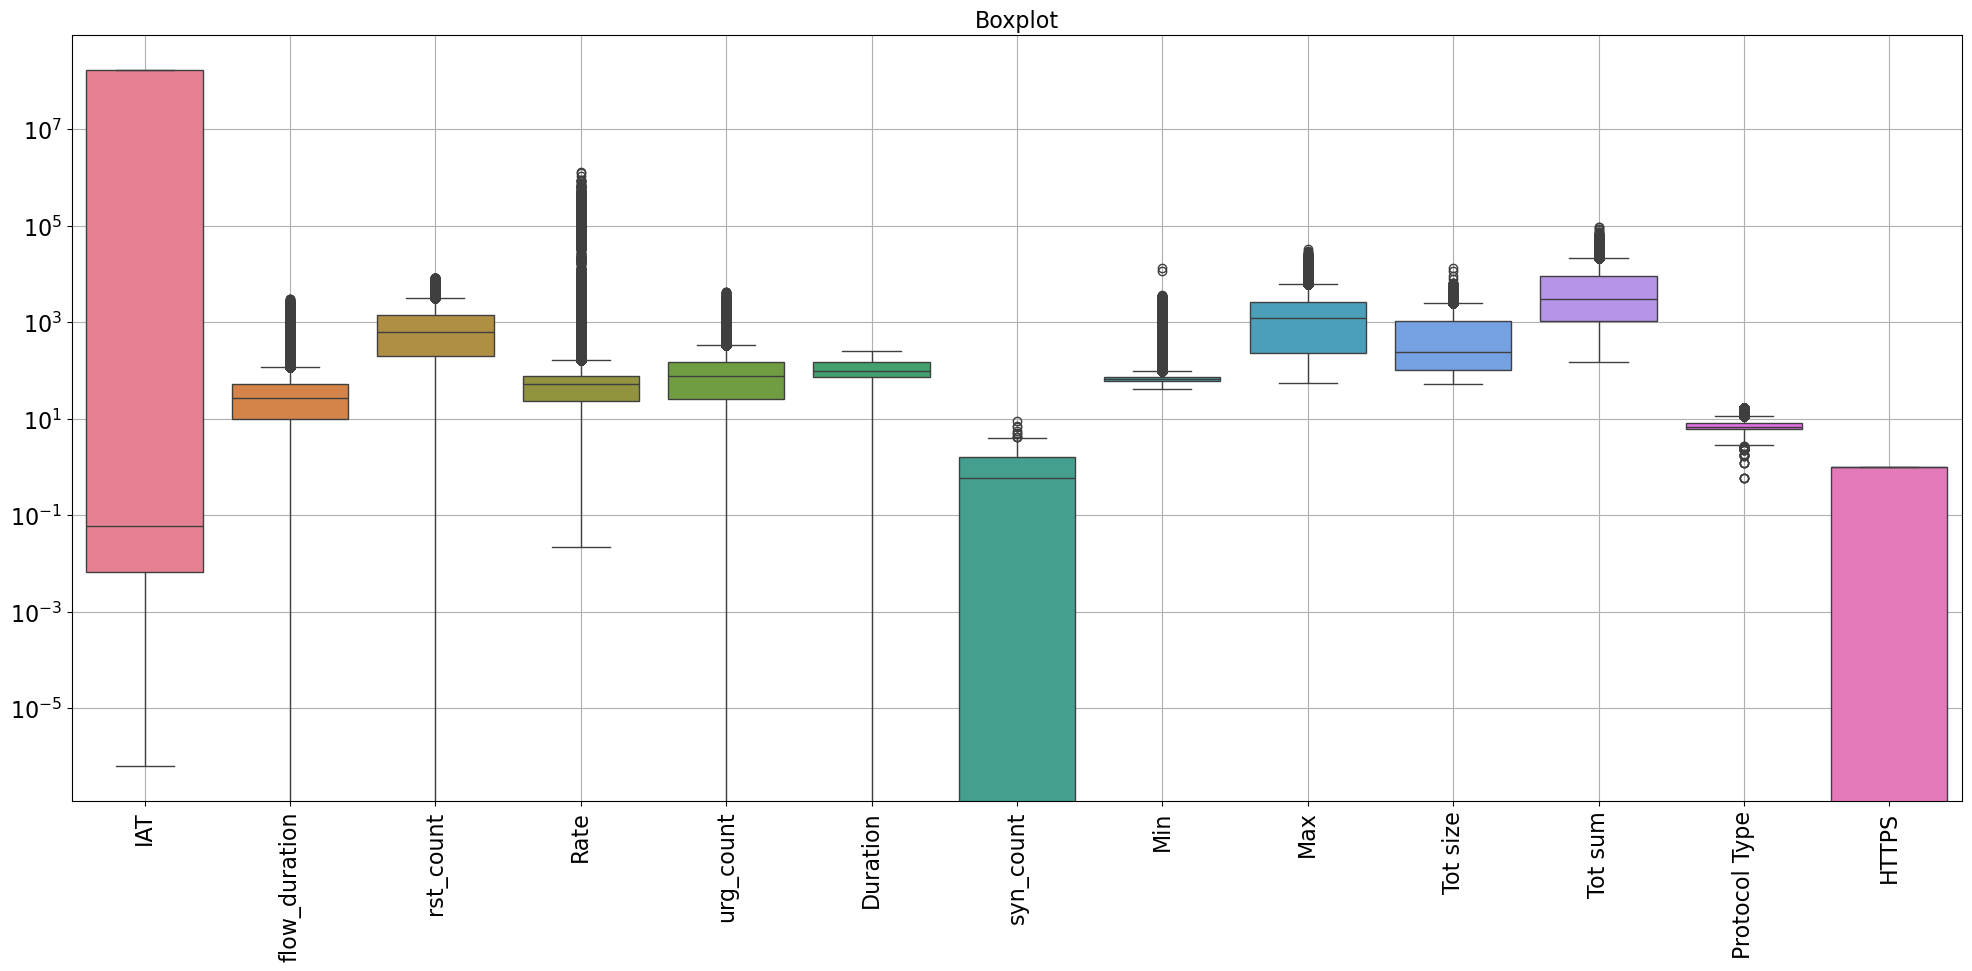

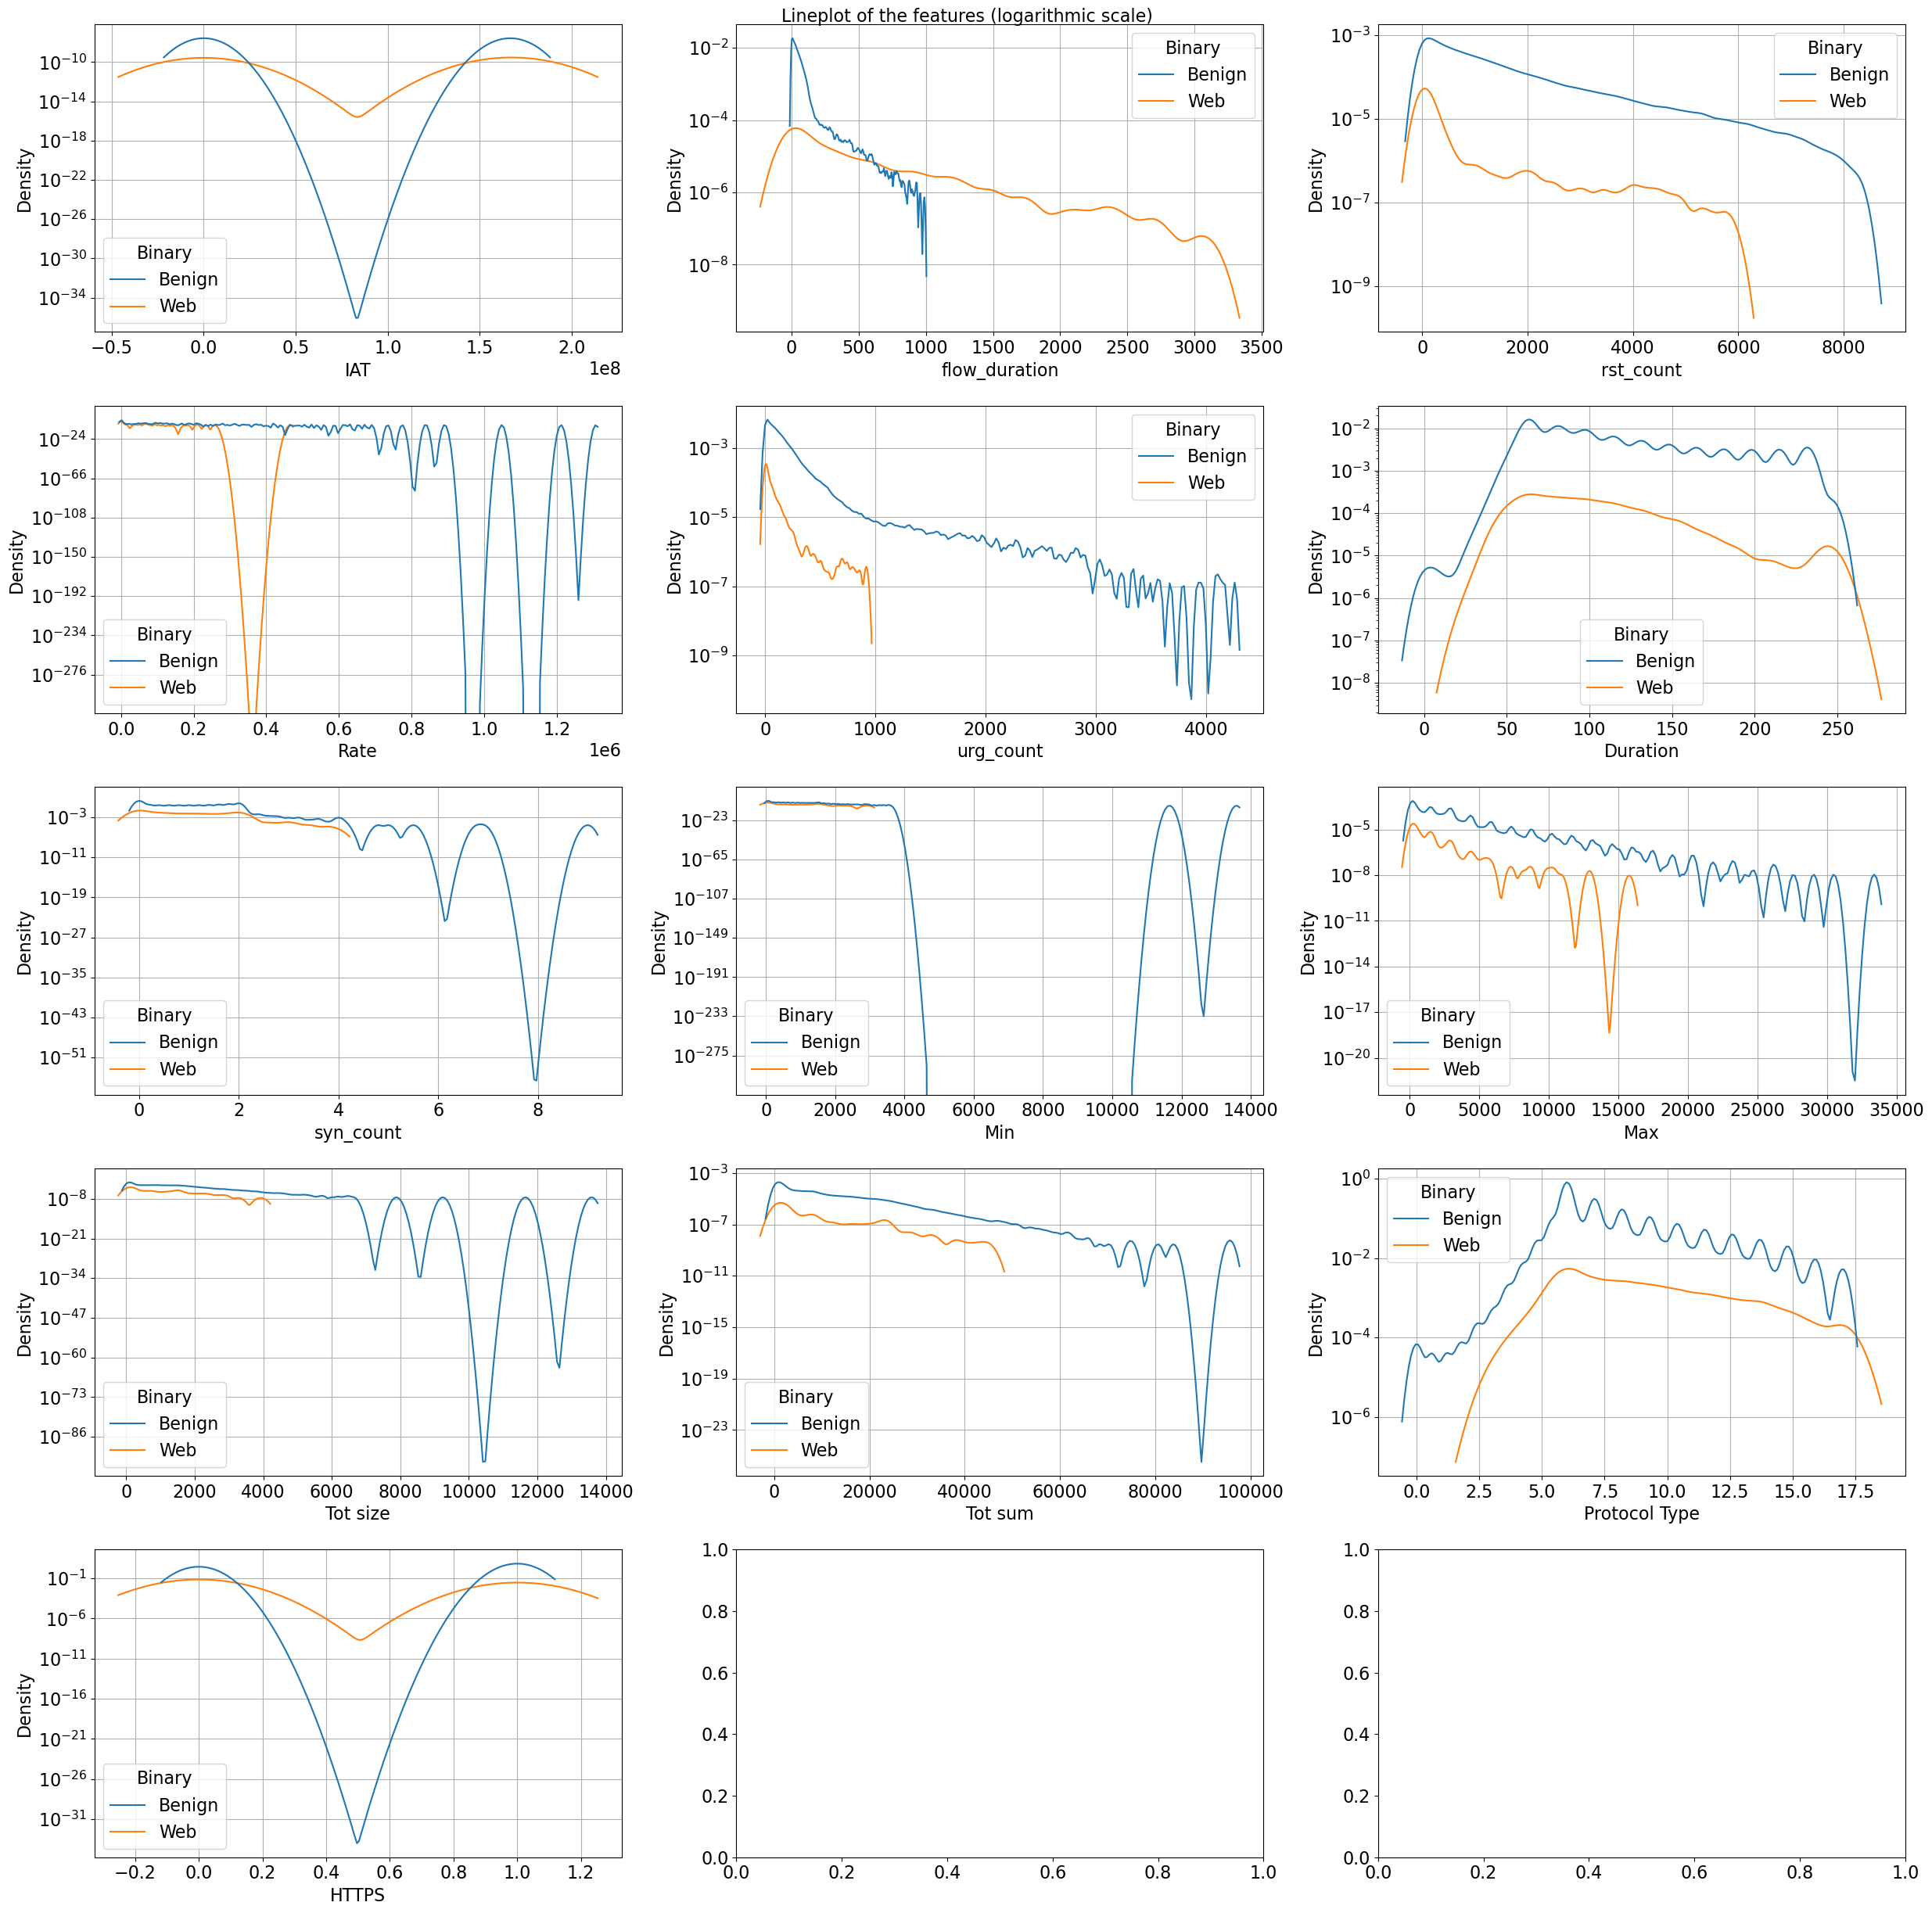

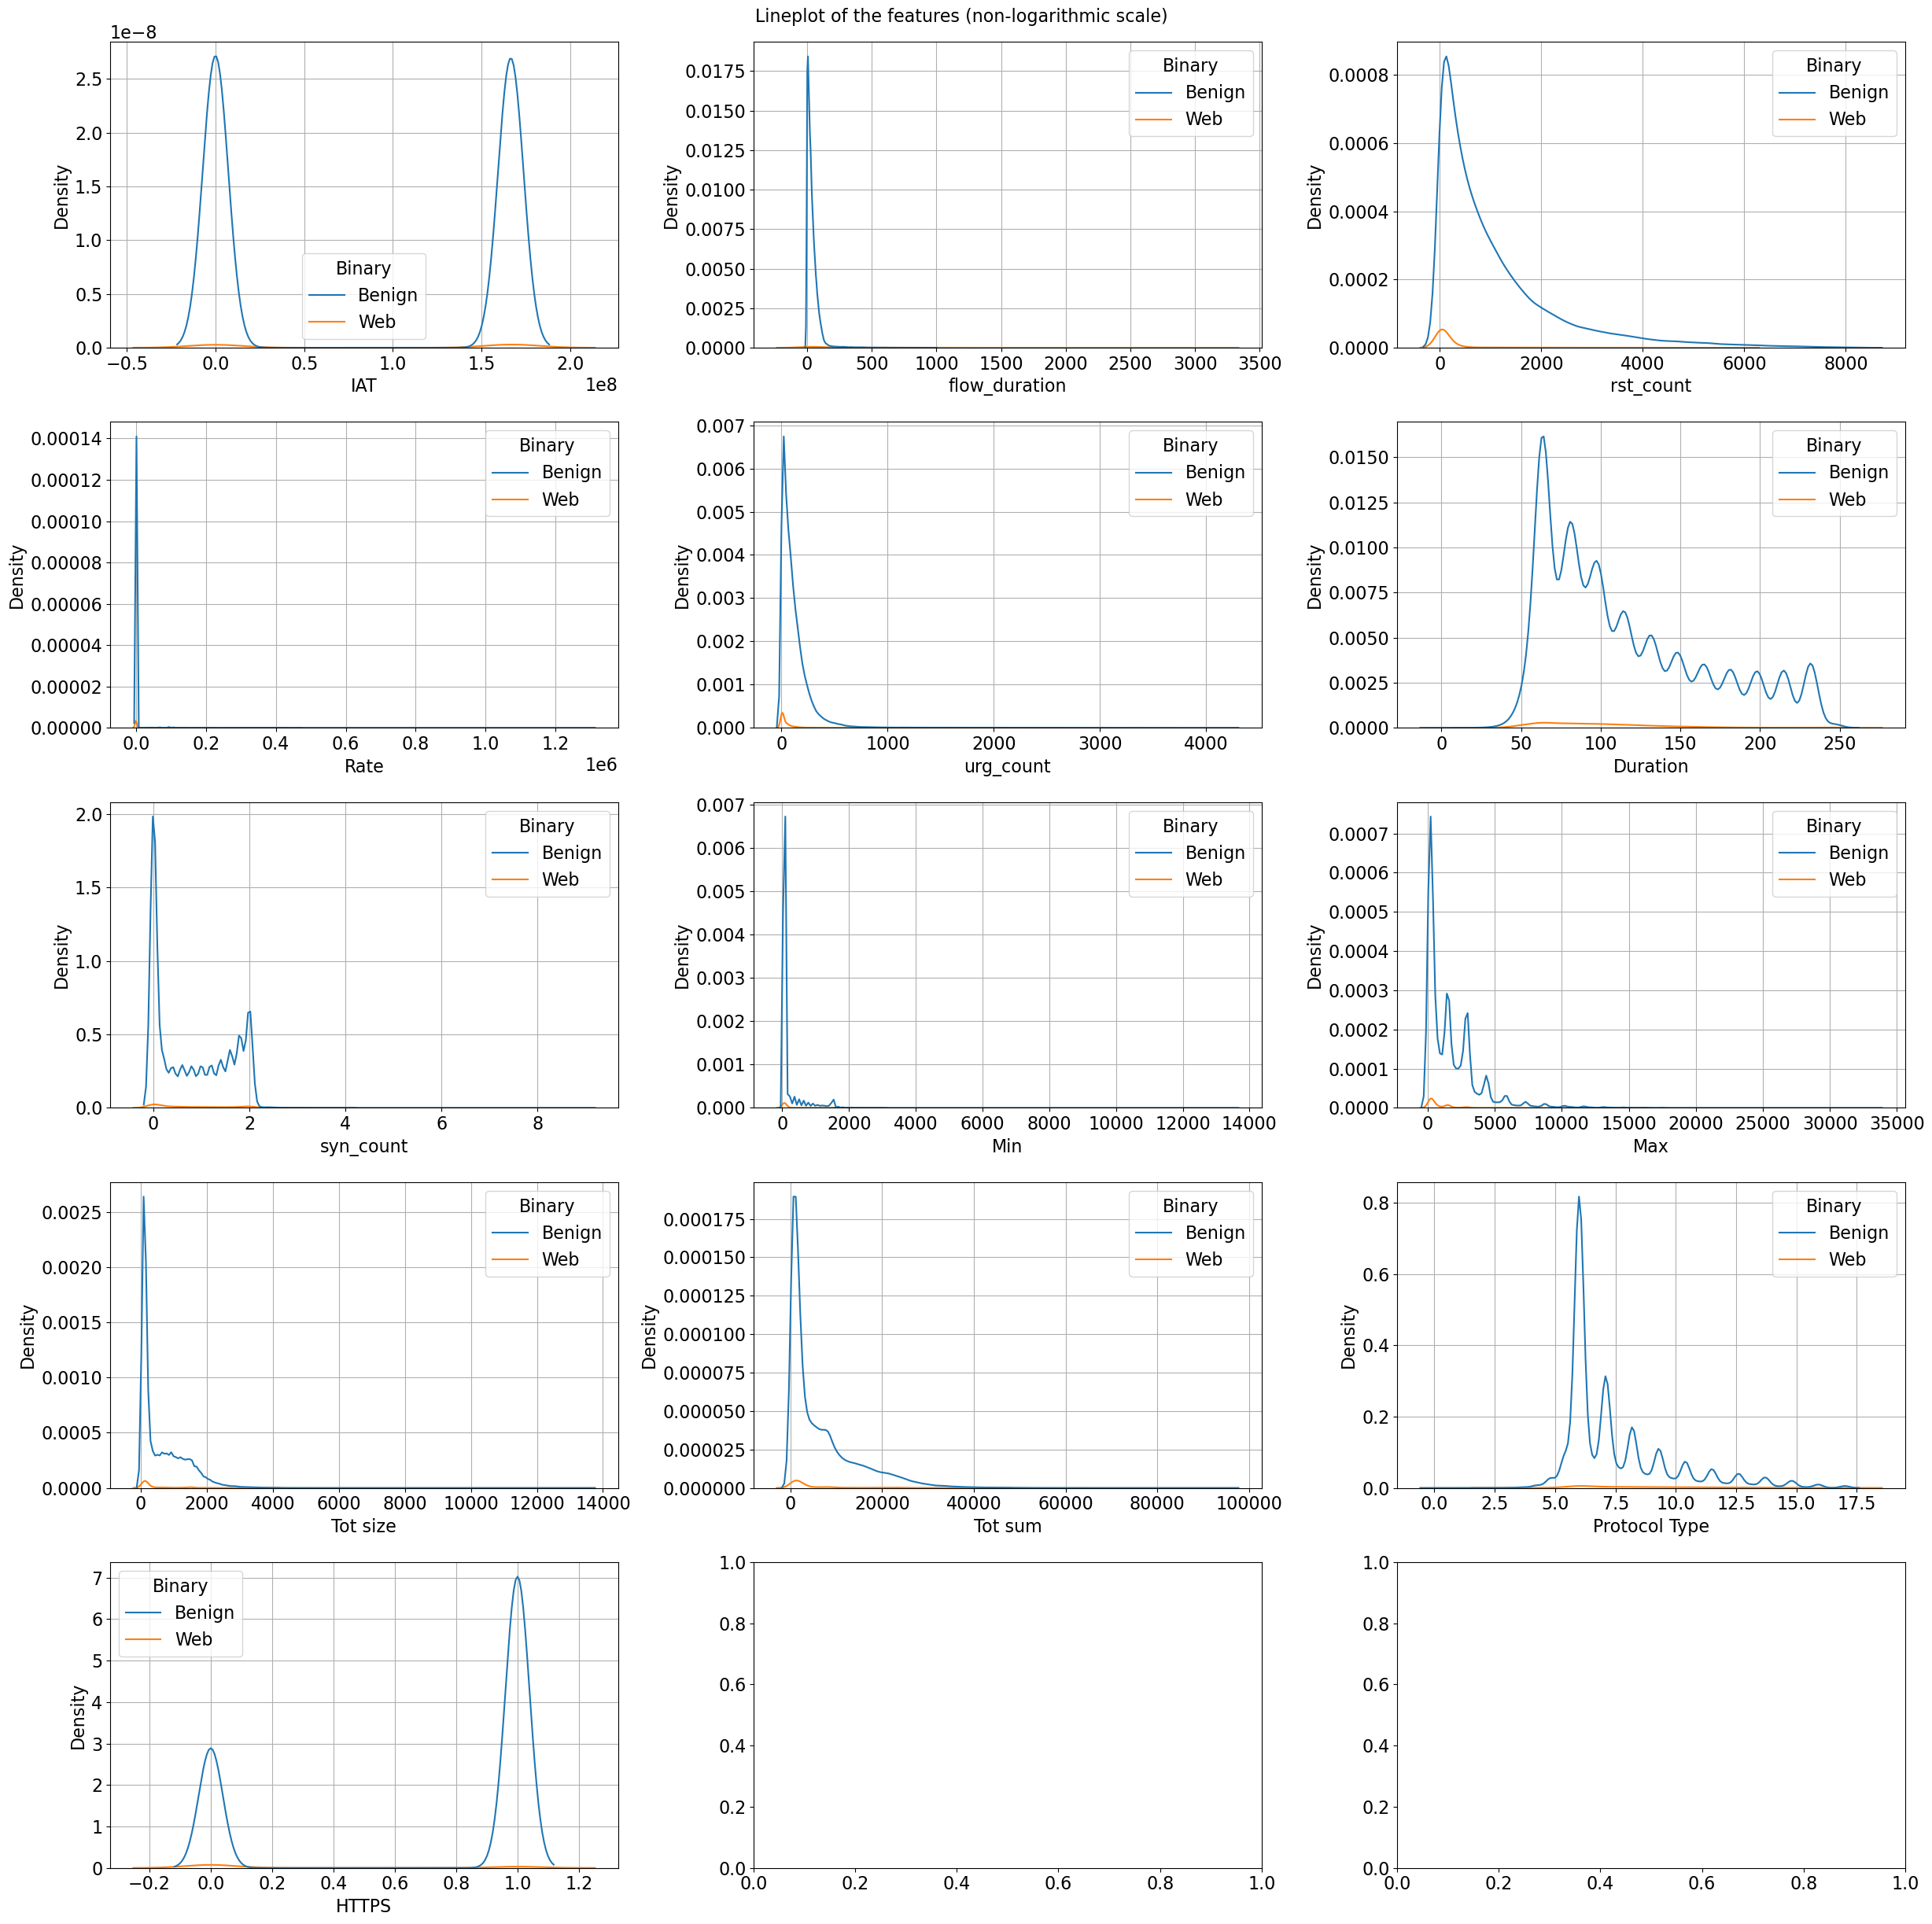

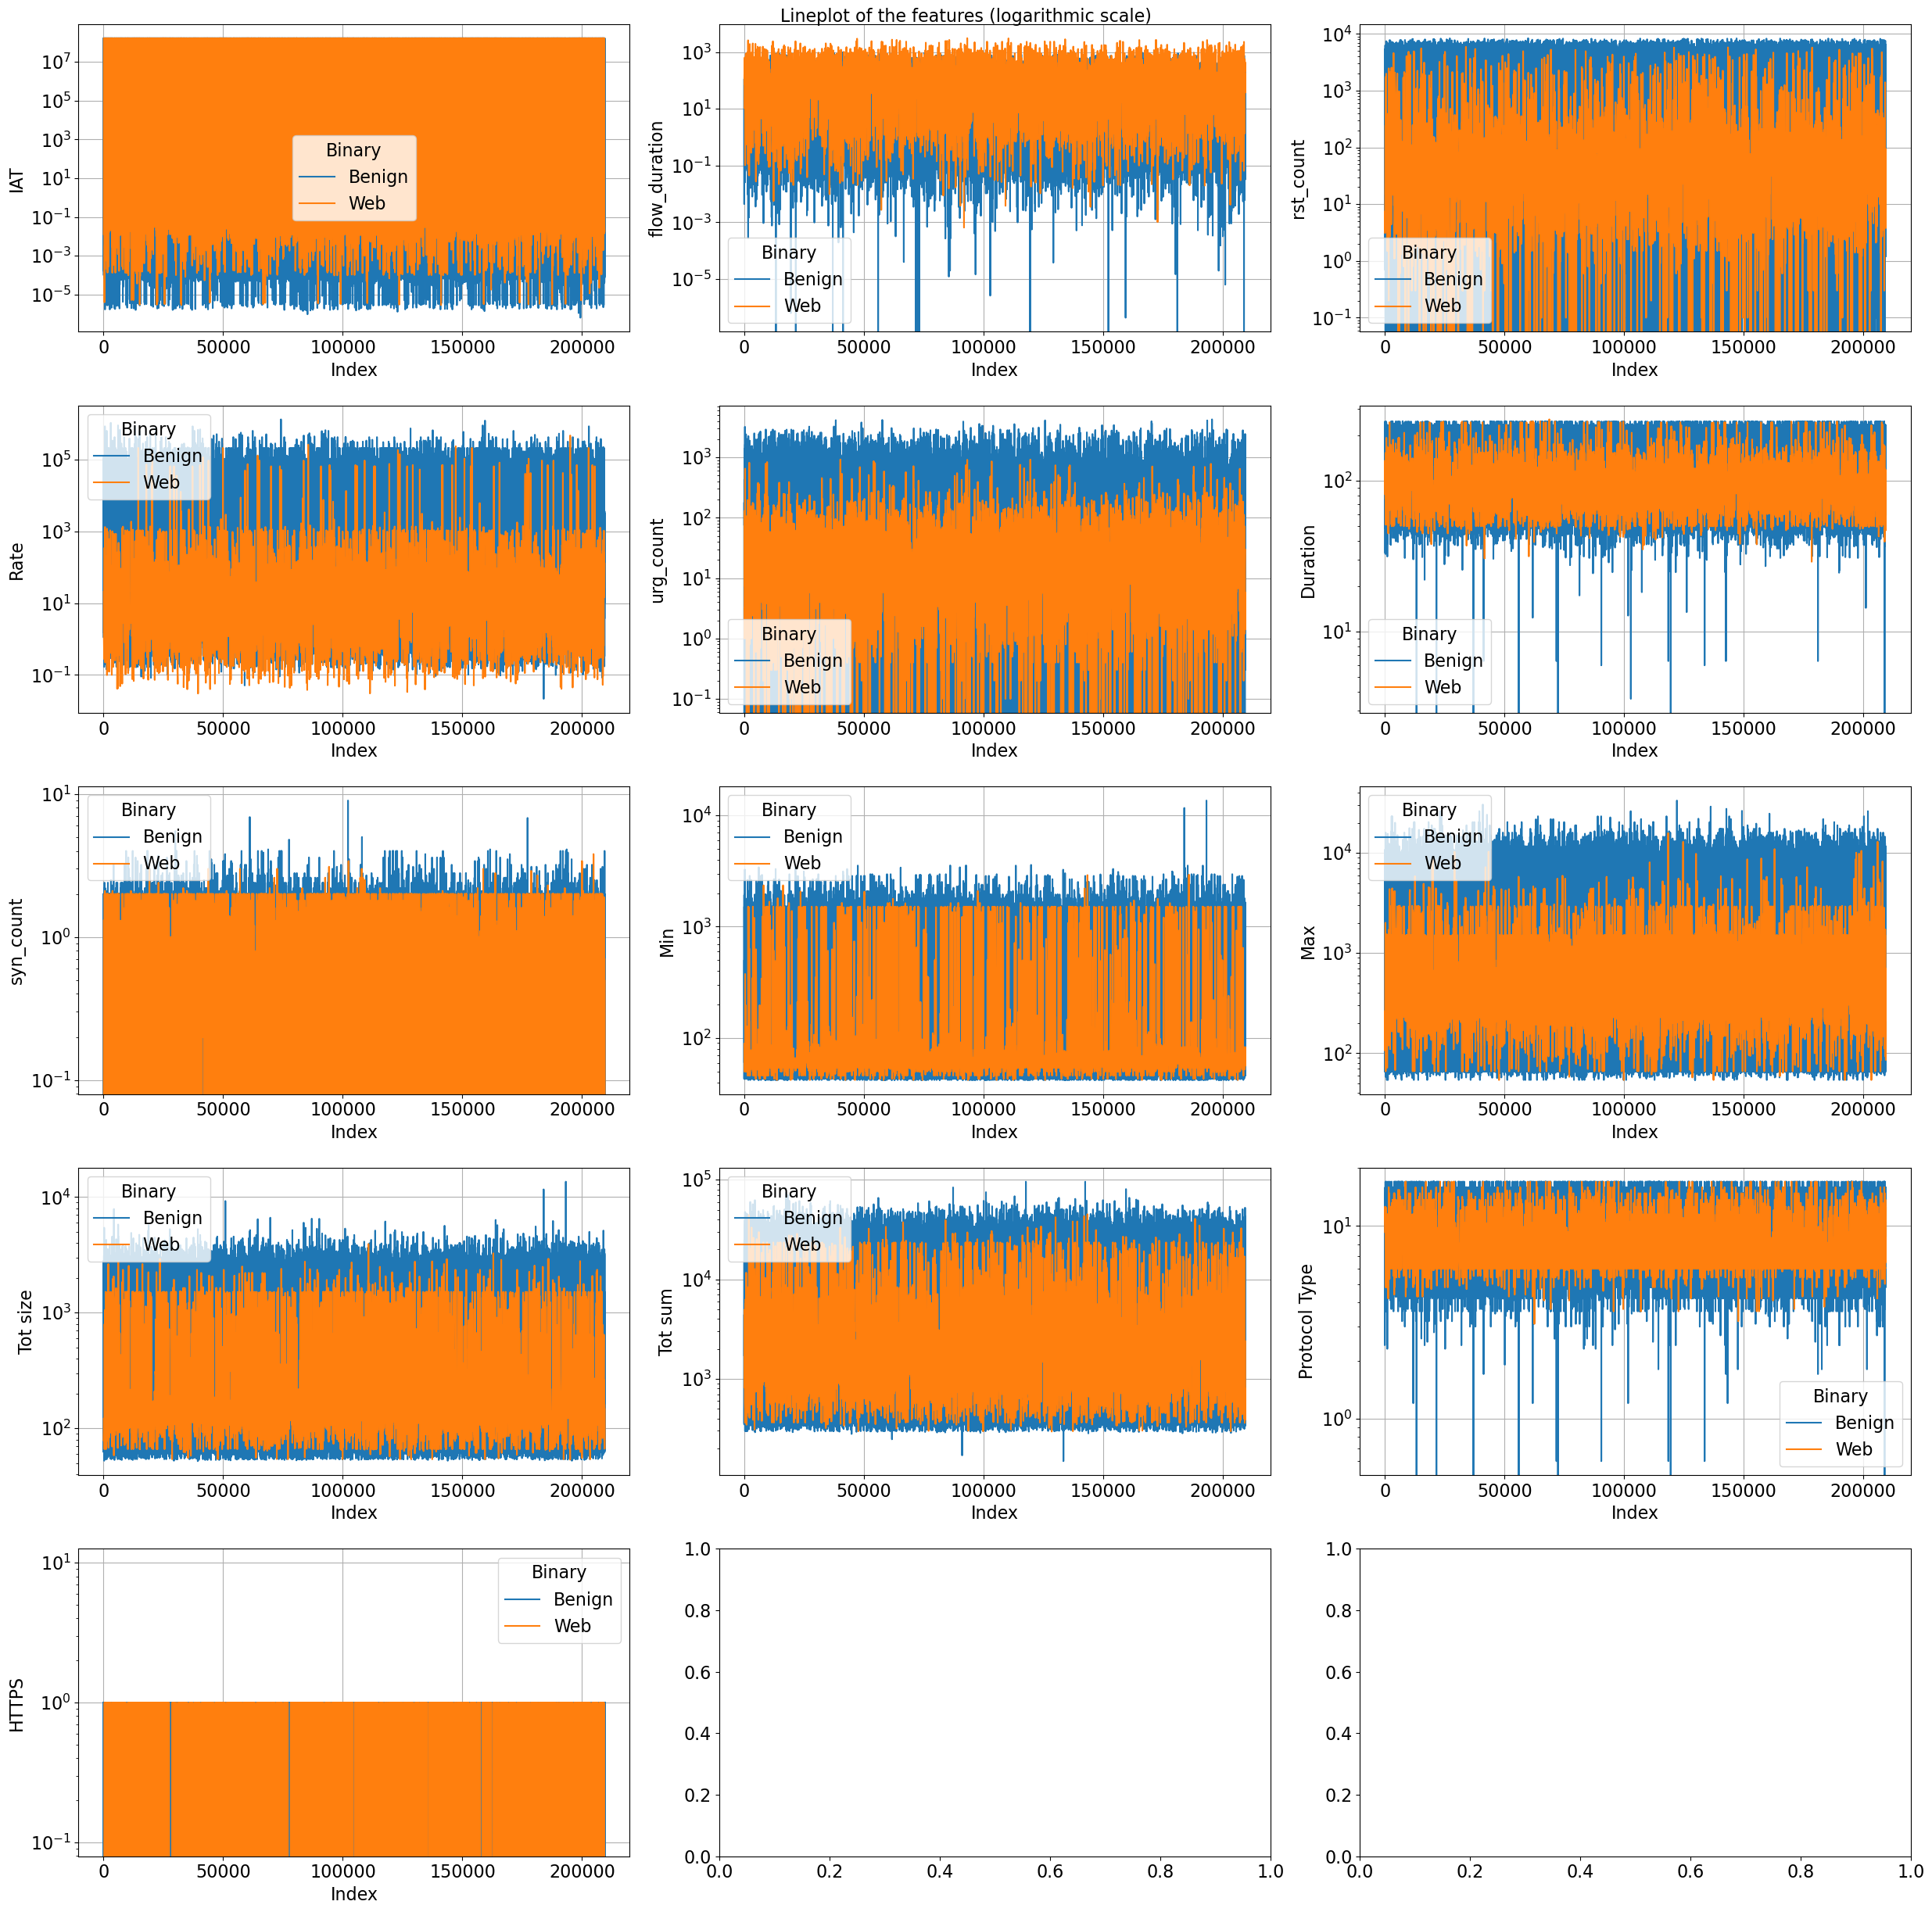

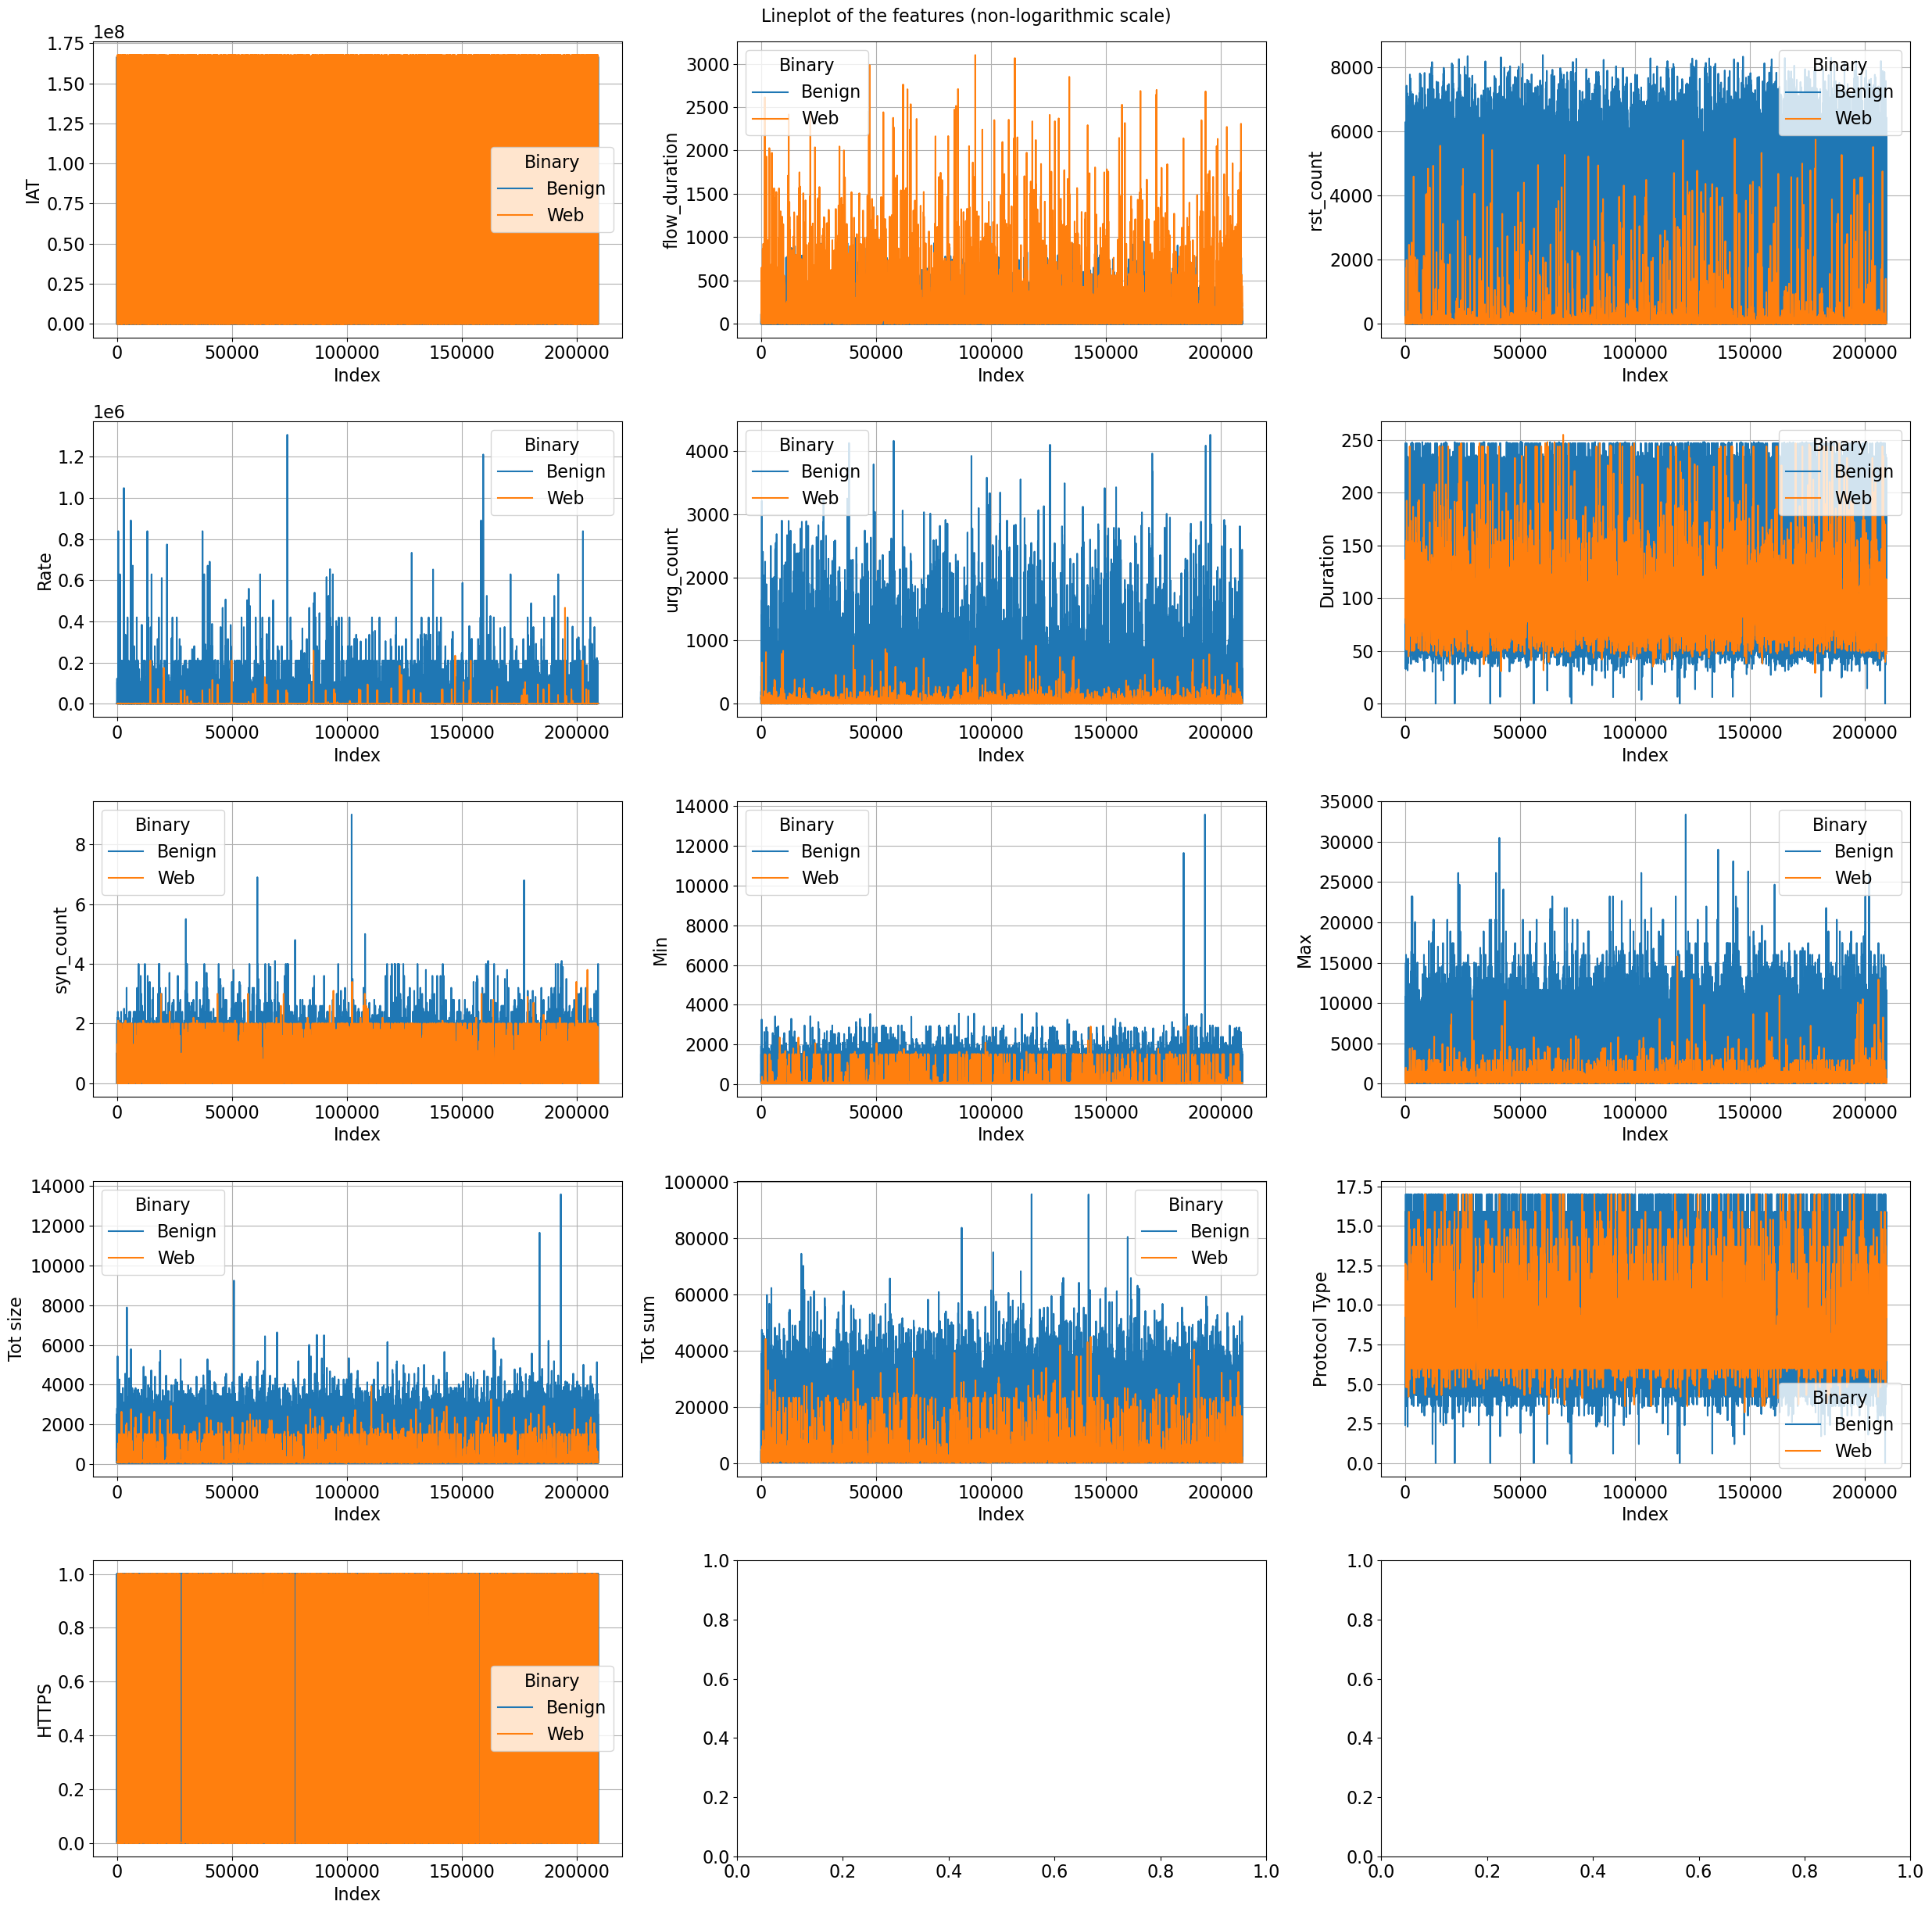

In [7]:
# Load selected X columns
selected_X = pd.read_csv(model_path_binary+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))
 
col = 'Binary'

plot_correlation_matrix(read_csv_file(train_sets[0], file_path)[selected_X], model_path_binary+'Correlation Matrix (sf).png', 'Correlation Matrix (sf)', lower=True)
plot_correlation_matrix(read_csv_file(train_sets[0], file_path)[X_columns], model_path_binary+'Correlation Matrix (all features).png', 'Correlation Matrix (all features)', labels=False, lower=True)

if len(selected_X) > 10:
    new_selected_X = selected_X[:10]
else:
    new_selected_X = selected_X
    
pairplot_binary = new_selected_X.copy()
pairplot_binary.append(col)
plot_pairplot(read_csv_file(train_sets[0], file_path)[pairplot_binary].iloc[:1000], model_path_binary+'Pairplot.png', col, 'Pairplot')

plot_boxplot(read_csv_file(train_sets[0], file_path)[selected_X], model_path_binary+'Boxplot.png', 'Boxplot')

# print("Nb features:", len(selected_X))
plot_kde_plot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'KDE plot (logarithmic scale).png', col, figsize=(25, 25), yscaleLog=True)
plot_kde_plot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'KDE plot (non-logarithmic scale).png', col, figsize=(25, 25), yscaleLog=False)

plot_lineplot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'Lineplot (logarithmic scale).png', col, figsize=(25, 25), yscaleLog=True)
plot_lineplot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'Lineplot (non-logarithmic scale).png', col, figsize=(25, 25), yscaleLog=False)

#### Display performance

In [ ]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_binary)
performance = performance.drop(0).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_binary + performance_path, index=False)

In [10]:
read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(30)

Model  Accuracy Training  Recall Training  \
9     Voting (Cat, XGB, RF)           0.998245         0.960417   
10            Bagging (Cat)           0.996474         0.923539   
3                       XGB           0.997142         0.939562   
11  Stacking (Cat, XGB, RF)           0.999801         0.996754   
15                   SF_XGB           0.996634         0.929437   
4                       Cat           0.997470         0.945459   
13                    SF_RF           0.999998         0.999956   
16                   SF_Cat           0.997113         0.938556   
1                        RF           1.000000         1.000000   
5                     LIGHT           0.994353         0.890188   
17                 SF_LIGHT           0.993843         0.880277   
6                    GBoost           0.991698         0.823348   
18                SF_GBoost           0.991421         0.816357   
14                    SF_ET           1.000000         1.000000   
7                  Adaboost           0.989832         0.827434   
2                        ET           1.000000         1.000000   
19              SF_Adaboost           0.989688         0.817409   
0                        DT           1.000000         1.000000   
12                    SF_DT           1.000000         1.000000   
8                       MLP           0.984485         0.678874   
20                   SF_MLP           0.983602         0.661708   

    Precision Training  F1 Training  Accuracy Testing  Recall Testing  \
9             0.998964     0.978880          0.993581        0.870591   
10            0.994306     0.956070          0.993529        0.872264   
3             0.993775     0.965022          0.993465        0.879450   
11            0.998644     0.997697          0.993374        0.882305   
15            0.991831     0.958424          0.992908        0.869752   
4             0.995675     0.969166          0.992772        0.872160   
13            0.999999     0.999977          0.992394        0.839762   
16            0.994136     0.964614          0.992316        0.865415   
1             1.000000     1.000000          0.992219        0.832383   
5             0.975068     0.928274          0.991986        0.852152   
17            0.972298     0.921094          0.991698        0.845210   
6             0.978943     0.885408          0.991045        0.812389   
18            0.979526     0.880501          0.990886        0.806363   
14            1.000000     1.000000          0.990116        0.786151   
7             0.920246     0.867801          0.989414        0.816722   
2             1.000000     1.000000          0.989243        0.764613   
19            0.925855     0.863346          0.989220        0.807138   
0             1.000000     1.000000          0.988783        0.870403   
12            1.000000     1.000000          0.988224        0.864313   
8             0.919986     0.748899          0.983979        0.682437   
20            0.907006     0.729275          0.983199        0.653232   

    Precision Testing  F1 Testing   FU_rate   FL_rate    FU    FL  Total rows  
9            0.978093    0.917224  0.000654  0.005765   202  1782      309091  
10           0.974644    0.916983  0.000783  0.005688   242  1758      309091  
3            0.964835    0.917623  0.001178  0.005358   364  1656      309091  
11           0.959495    0.917194  0.001401  0.005225   433  1615      309091  
15           0.960530    0.909946  0.001304  0.005788   403  1789      309091  
4            0.954474    0.909024  0.001553  0.005675   480  1754      309091  
13           0.981688    0.897925  0.000459  0.007147   142  2209      309091  
16           0.949608    0.902956  0.001711  0.005972   529  1846      309091  
1            0.986275    0.894238  0.000301  0.007480    93  2312      309091  
5            0.954724    0.896614  0.001443  0.006571   446  2031      309091  
17           0.954410    0.892008  0.001420  0.006881   439 

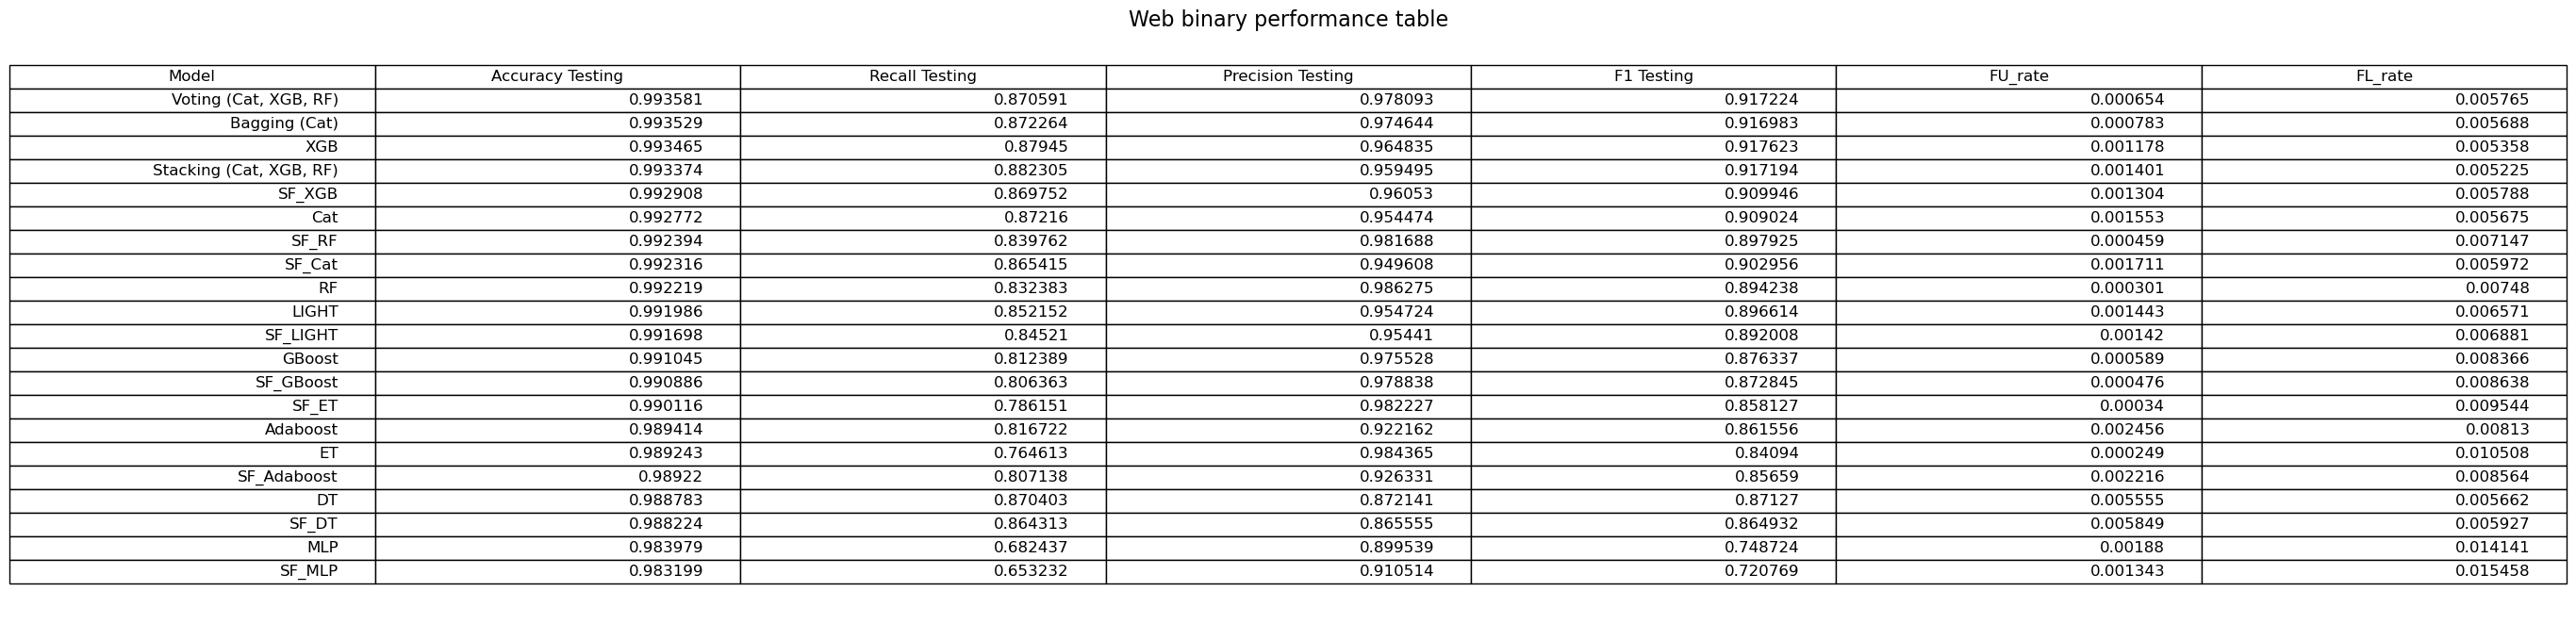

In [11]:
# Performance table
performance_table = read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(30)
performance_table = performance_table[['Model', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate']]
performance_table = performance_table.round(6)

plot_performance_table(performance_table, model_path_binary+'Performance table.png', 'Web binary performance table', figsize=(35, 8))

## Do prediction for after build sets

In [5]:
# Define model and import encoder
model = joblib.load(model_path_binary + 'model_XGB.joblib')
encoder = get_encoder(model_path_binary, "Please, build binary model(s) first")

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, after_build_sets, file_path, X_columns, y_column=z_column, z_column=y_column, scale=True, encode=True, scaler=scaler, encoder=encoder)

# Build new dataframe
new_after_build_set[z_column] = encoder.inverse_transform(y_test)
new_after_build_set['Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[y_column] = z_test
count = len(new_after_build_set[new_after_build_set[z_column] != new_after_build_set['Prediction']])

# Save dataframe
new_after_build_set.to_csv(local_path + after_build_csv, index=False)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set) * 100,len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows'])

del new_after_build_set

res.head()

100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


Accuracy    Recall  Precision        F1  Mispredicted count  \
0  0.963103  0.963103   0.962985  0.962626               11161   

   Mispredicted rate  Total rows  
0           3.689697      302491

## Second model (All Web classes)

### Building model

In [6]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

In [7]:
filter_name = [
    {'name': 'Web', 'type': '='},
]
filter_cols = ['Binary']

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 923.38it/s]


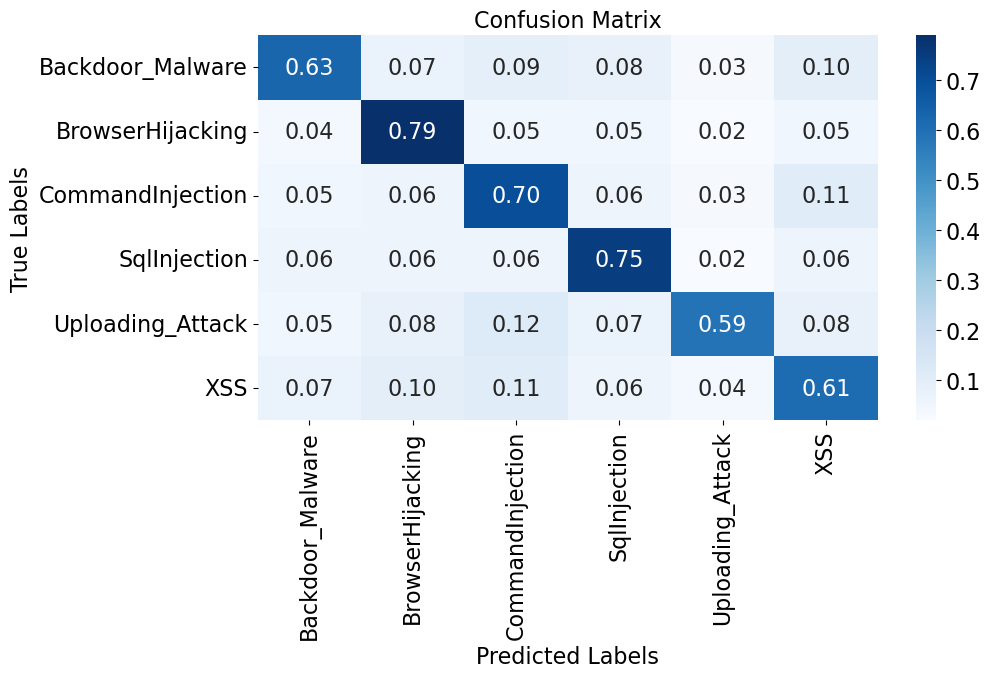

100%|██████████| 6/6 [00:00<00:00, 910.45it/s]


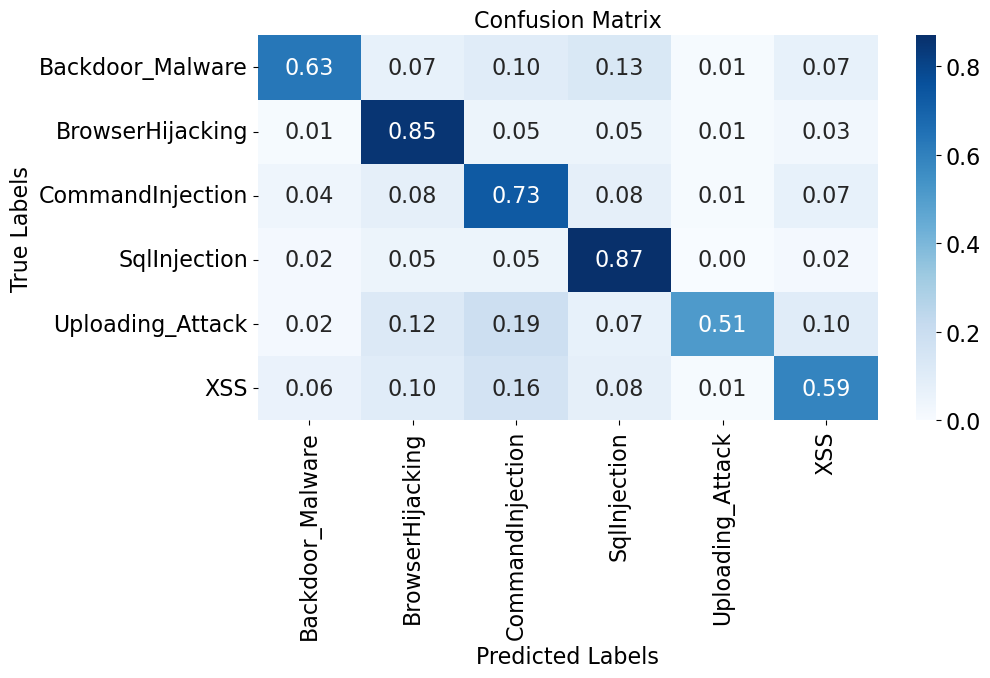

100%|██████████| 6/6 [00:00<00:00, 666.08it/s]


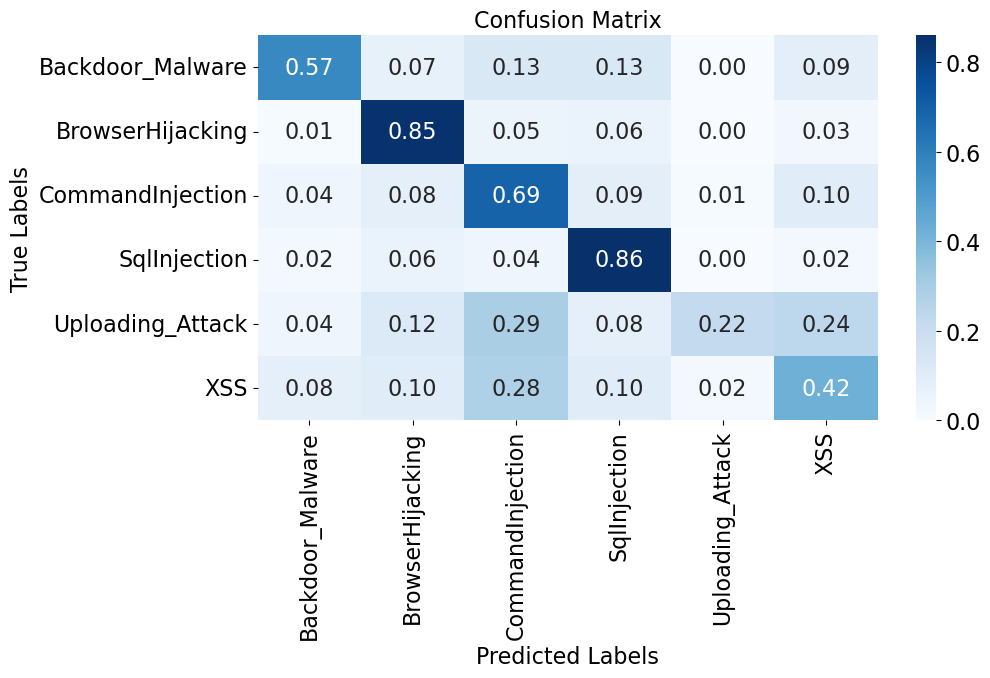

100%|██████████| 6/6 [00:00<00:00, 544.62it/s]


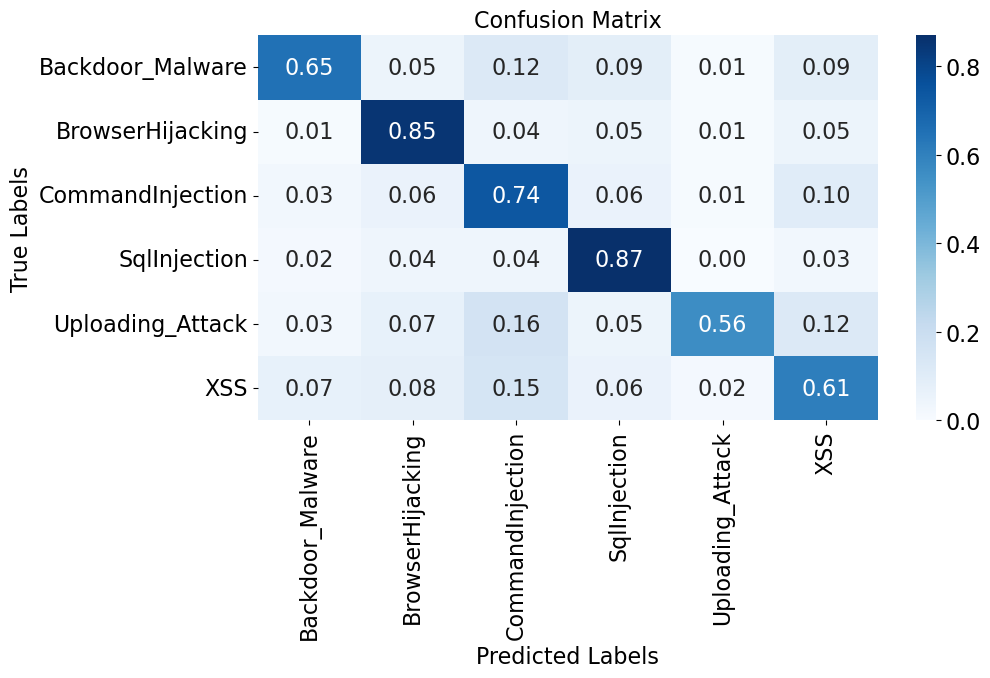

100%|██████████| 6/6 [00:00<00:00, 856.21it/s]


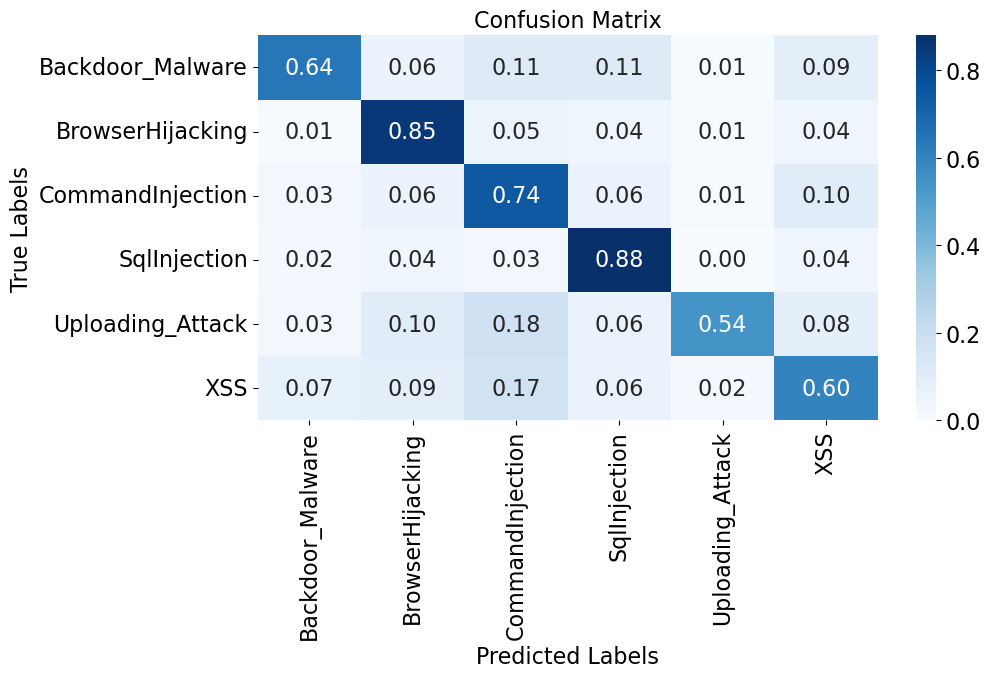

 56%|█████▌    | 5/9 [00:31<00:32,  8.06s/it]  File "c:\Users\mlcra\AppData\Local\Programs\Orange\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 6/6 [00:00<00:00, 544.33it/s]


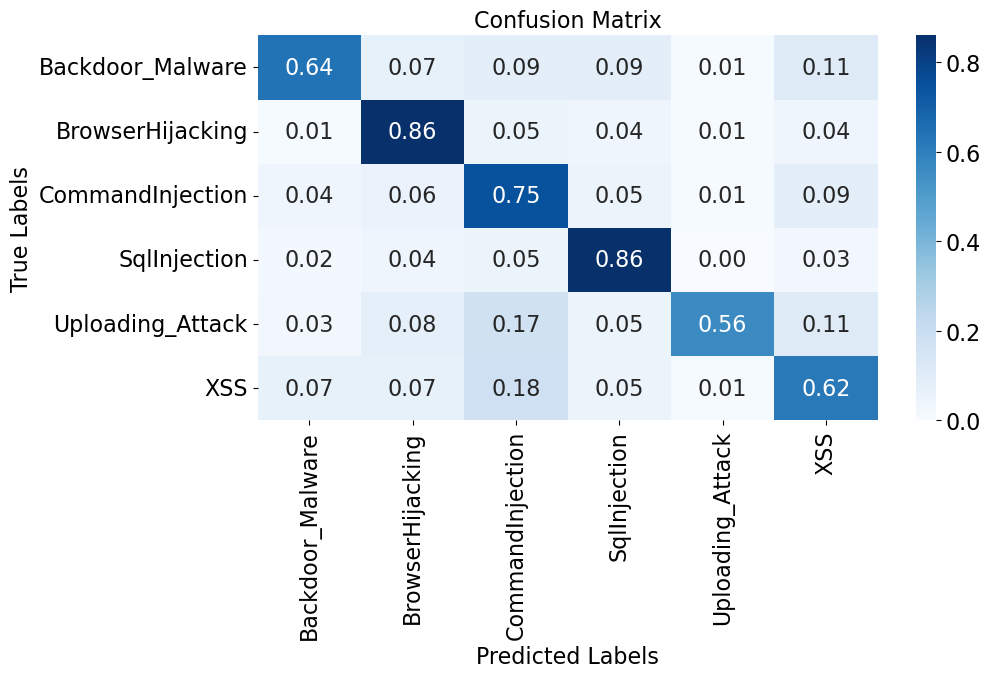

100%|██████████| 6/6 [00:00<00:00, 855.51it/s]


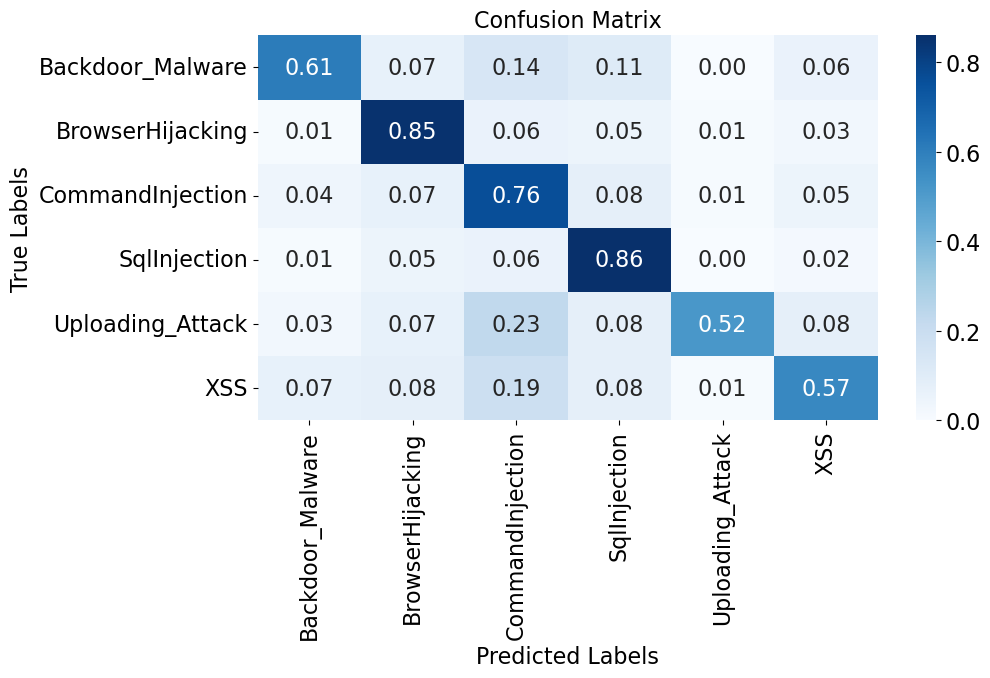

100%|██████████| 6/6 [00:00<00:00, 749.52it/s]


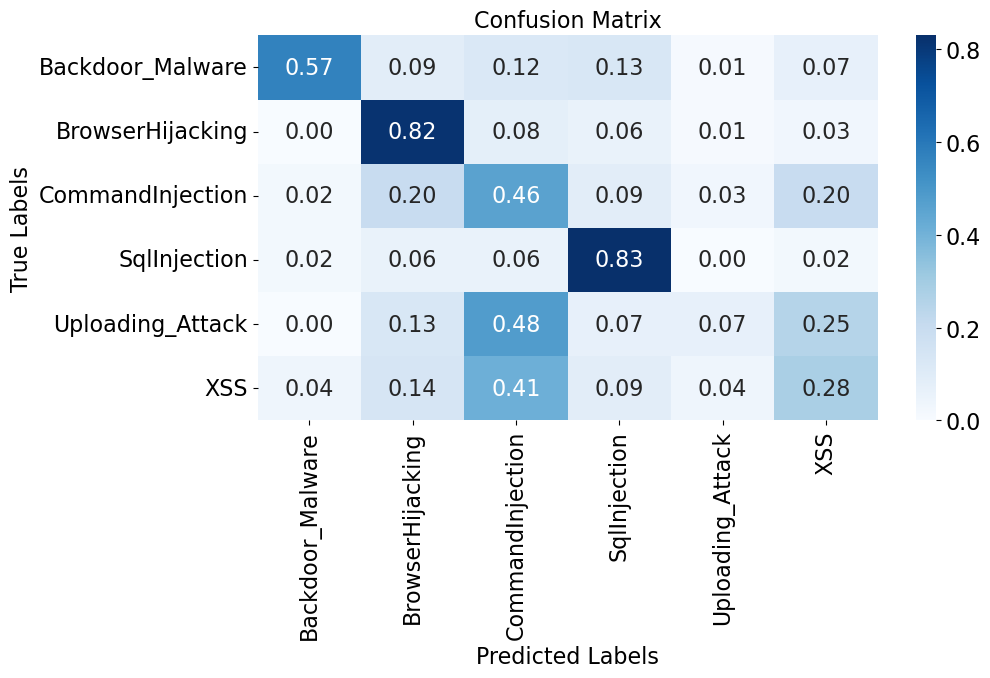

100%|██████████| 6/6 [00:00<00:00, 749.05it/s]


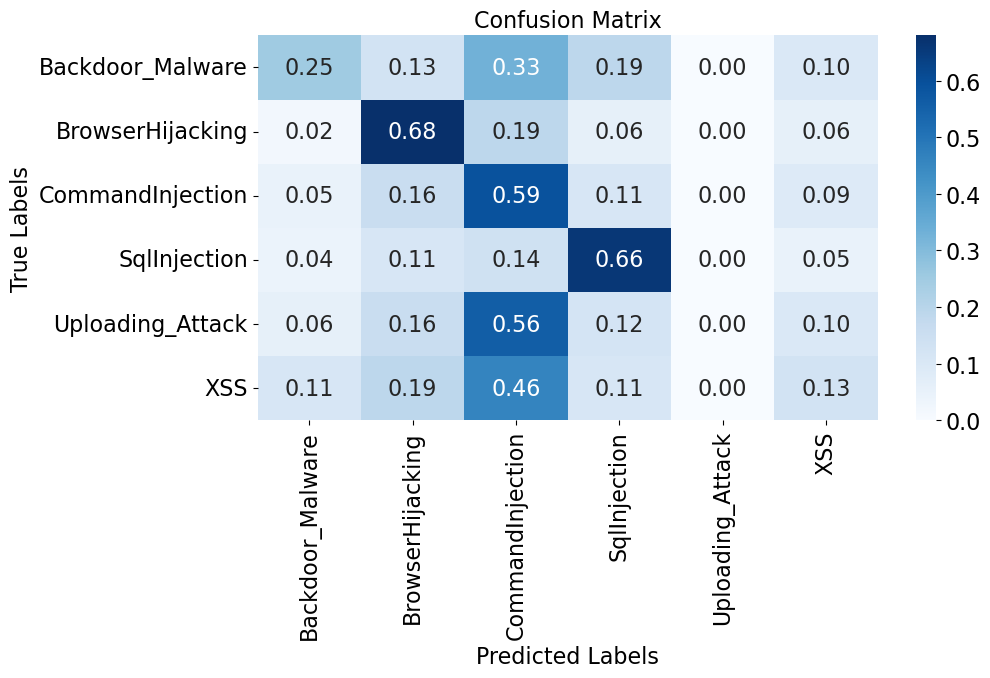

100%|██████████| 9/9 [01:22<00:00,  9.12s/it]


['.\\Web_model\\All_classes\\encoder.joblib']

In [8]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Load selected X columns
selected_X = pd.read_csv(model_path_all_classes+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))

# Buidling models
plotConfusionMatrix = True
figsizeConfusionMatrix = (10, 5)
saveConfusionMatrix = False
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], 'SF_' + model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes + 'SF_', X_columns=selected_X , y_column=y_column, filter_cols=filter_cols, filter_bool=True, \
                                                     filter_name=filter_name, scaler=scaler, encoder=encoder, confusionMatrix=plotConfusionMatrix, saving=saveConfusionMatrix, pathToSave=model_path_all_classes+'SF_'+model['Name'], figsize=figsizeConfusionMatrix)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

#### Complex models

In [10]:
complexModelsDitionnary = [
    {
        "Name": "Voting (Cat, XGB, LIGHT)",
        "Model": VotingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ('LIGHT', LGBMClassifier(random_state = 42, verbose = 0)),
            ],
            voting='soft')
    },
    {
        "Name": "Bagging (LIGHT)",
        "Model": BaggingClassifier(base_estimator=LGBMClassifier(random_state = 42, verbose = 0), n_estimators=15)
    },
    {
        "Name": "Stacking (Cat, LIGHT, XGB)",
        "Model": StackingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ],
            final_estimator=LGBMClassifier(random_state = 42, verbose = 0),
            cv=5)
    },
]

In [13]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Buidling models
for model in tqdm(complexModelsDitionnary):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes + "complex_", X_columns=X_columns , y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scaler=scaler, encoder=encoder)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

  0%|          | 0/3 [00:00<?, ?it/s]  File "c:\Users\mlcra\AppData\Local\Programs\Orange\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 3/3 [02:24<00:00, 48.18s/it]


['.\\Web_model\\All_classes\\encoder.joblib']

#### Select features by importance

In [4]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": joblib.load(model_path_all_classes+'model_DT.joblib')
    },
    {
        "Name": "RF",
        "Model": joblib.load(model_path_all_classes+'model_RF.joblib')
    },
    {
        "Name": "XGB",
        "Model": joblib.load(model_path_all_classes+'model_XGB.joblib')
    },
    {
        "Name": "Cat",
        "Model": joblib.load(model_path_all_classes+'model_Cat.joblib')
    },
    {
        "Name": "LIGHT",
        "Model": joblib.load(model_path_all_classes+'model_LIGHT.joblib')
    },
    {
        "Name": "GBoost",
        "Model": joblib.load(model_path_all_classes+'model_GBoost.joblib')
    },
    {
        "Name": "Adaboost",
        "Model": joblib.load(model_path_all_classes+'model_Adaboost.joblib')
    },
]

100%|██████████| 7/7 [00:00<00:00, 268.98it/s]


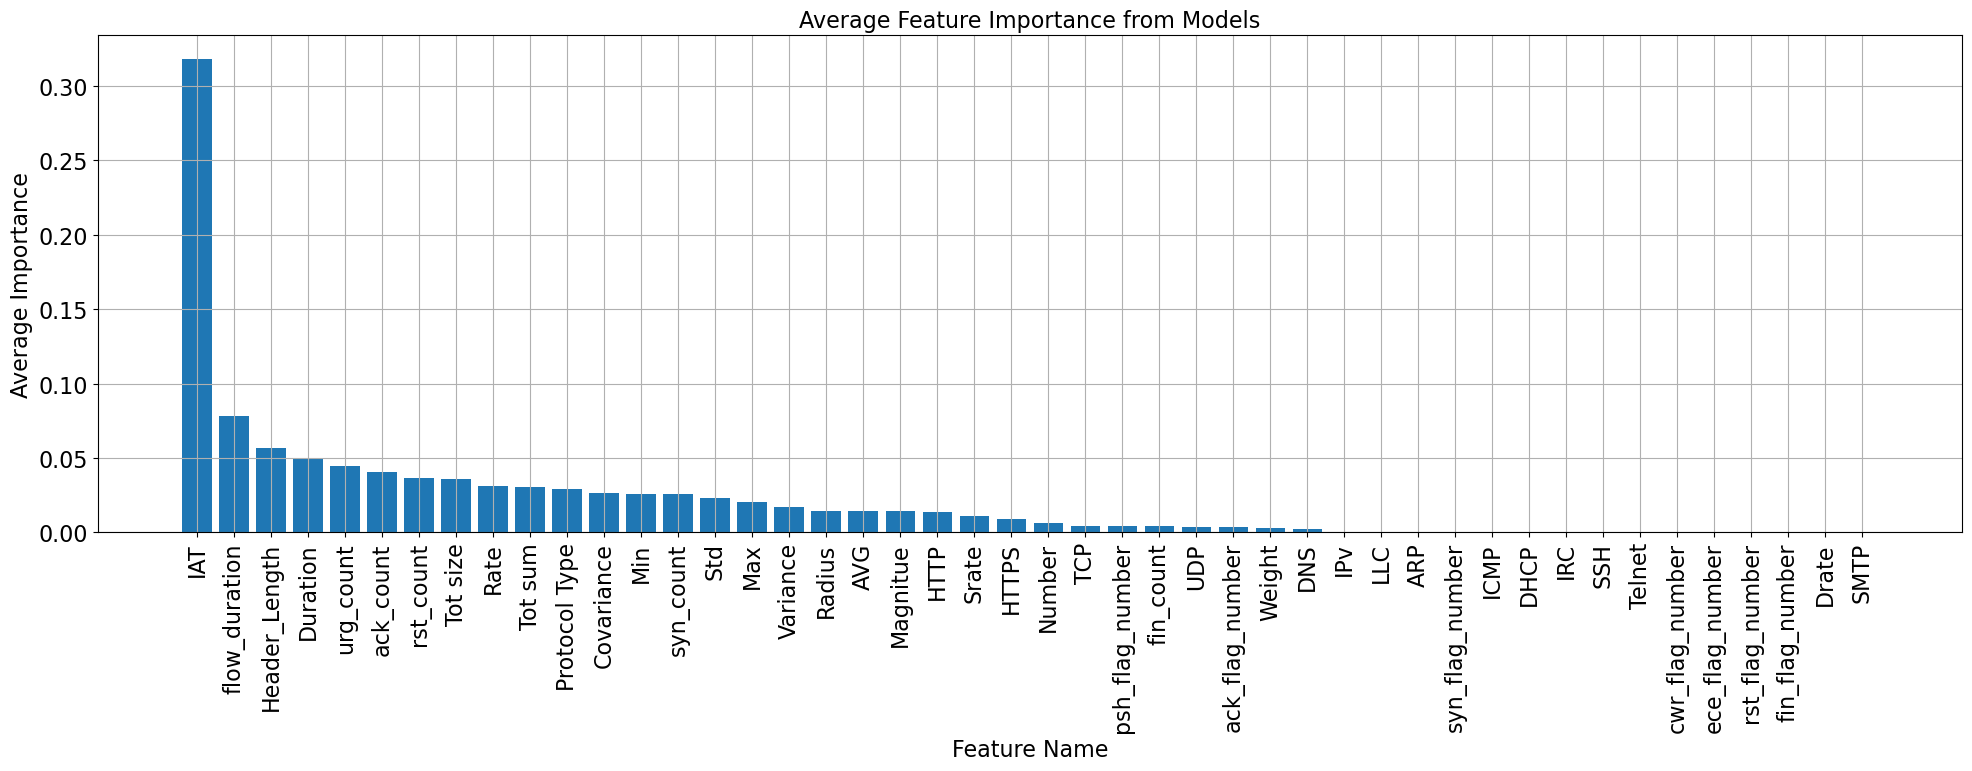

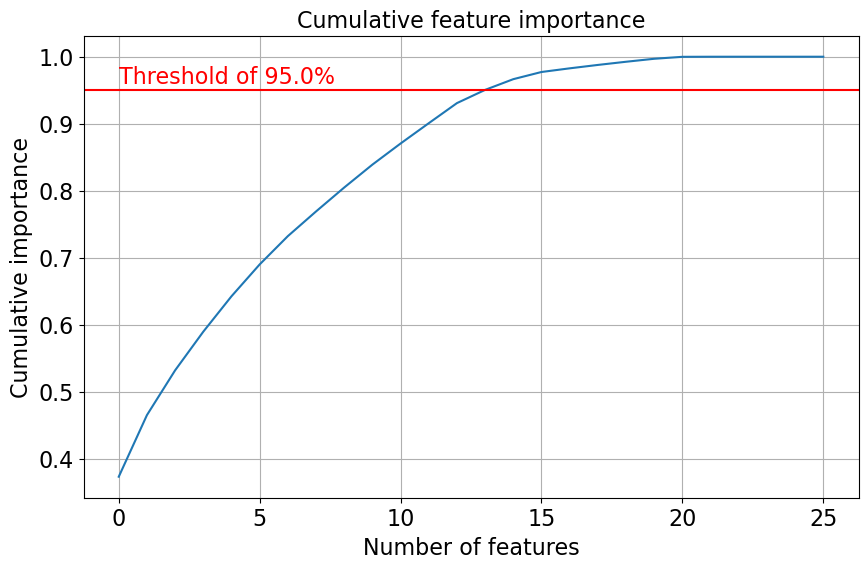

['IAT', 'flow_duration', 'Header_Length', 'Duration', 'urg_count', 'ack_count', 'Tot size', 'Rate', 'Tot sum', 'Protocol Type', 'Covariance', 'Min', 'syn_count']


100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


In [5]:
# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, X_columns, model_path_all_classes, all_features=True, figsize=(20, 8))
average_importance_df.to_csv(model_path_all_classes+'feature_importance.csv', index=False)
average_importance_df.to_csv('.\\resultats\\Web\\All_classes\\feature_importance.csv', index=False)

# Load feature importance dataframe
average_importance_df = pd.read_csv(model_path_all_classes+'feature_importance.csv')
# print(average_importance_df.head(average_importance_df.size))

# Remove features with correlation > 0.80
threshold = 0.80
features_with_threshold_corr = remove_features_with_correlation_and_feature_importance(read_csv_file(train_sets[0], file_path)[X_columns], average_importance_df, threshold=threshold)
# print(features_with_threshold_corr.head(features_with_threshold_corr.size))

# Select features with cumulative importance > 0.95 and correlation < 0.80
selected_X = select_features_by_importance(features_with_threshold_corr['Feature'].values, features_with_threshold_corr['Average Importance'].values, model_path_all_classes, threshold_percentage=0.95)
pd.DataFrame(selected_X).to_csv(model_path_all_classes+'selected_X_columns.csv', index=False)
print(selected_X)

# Define and fit scaler
scaler = MinMaxScaler()
for train_set in tqdm(train_sets):
    scaler.fit(read_csv_file(train_set, file_path)[selected_X])

### Display performance

In [15]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_all_classes)
performance = performance.drop(0).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_all_classes + performance_path, index=False)

In [9]:
read_csv_file(performance_path, model_path_all_classes).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(50)

Model  Accuracy Training  Recall Training  \
9     Voting (Cat, XGB, LIGHT)           0.999736         0.999699   
10             Bagging (LIGHT)           0.996474         0.995959   
5                        LIGHT           0.999824         0.999809   
3                          XGB           0.999912         0.999932   
15                      SF_XGB           1.000000         1.000000   
17                    SF_LIGHT           0.999824         0.999869   
4                          Cat           0.987218         0.983968   
16                      SF_Cat           0.987747         0.984763   
6                       GBoost           0.854637         0.827617   
13                       SF_RF           1.000000         1.000000   
11  Stacking (Cat, LIGHT, XGB)           0.881700         0.866203   
18                   SF_GBoost           0.846262         0.815745   
1                           RF           1.000000         1.000000   
0                           DT           1.000000         1.000000   
12                       SF_DT           1.000000         1.000000   
14                       SF_ET           1.000000         1.000000   
2                           ET           1.000000         1.000000   
19                 SF_Adaboost           0.637341         0.570917   
7                     Adaboost           0.618036         0.532928   
8                          MLP           0.534379         0.440642   
20                      SF_MLP           0.502028         0.403937   

    Precision Training  F1 Training  Accuracy Testing  Recall Testing  \
9             0.999769     0.999734          0.759090        0.716770   
10            0.996988     0.996470          0.758656        0.713771   
5             0.999864     0.999837          0.758366        0.715855   
3             0.999932     0.999932          0.756483        0.715970   
15            1.000000     1.000000          0.753875        0.715034   
17            0.999869     0.999869          0.753151        0.713321   
4             0.989547     0.986689          0.748515        0.707080   
16            0.989592     0.987120          0.747791        0.706248   
6             0.877687     0.847338          0.743590        0.697573   
13            1.000000     1.000000          0.741127        0.695678   
11            0.879573     0.872030          0.740258        0.699399   
18            0.869949     0.836508          0.740258        0.694265   
1             1.000000     1.000000          0.740113        0.686288   
0             1.000000     1.000000          0.714182        0.688415   
12            1.000000     1.000000          0.701434        0.676670   
14            1.000000     1.000000          0.680863        0.600604   
2             1.000000     1.000000          0.630885        0.537187   
19            0.627743     0.584156          0.589599        0.506261   
7             0.553548     0.534970          0.573084        0.499275   
8             0.493764     0.430940          0.498189        0.412579   
20            0.396889     0.388317          0.483413        0.386612   

    Precision Testing  F1 Testing   FU_rate   FL_rate    FU    FL  Total rows  
9            0.758166    0.732131  0.120238  0.120672   830   833        6903  
10           0.769460    0.733007  0.117920  0.123425   814   852        6903  
5            0.755856    0.730893  0.119948  0.121686   828   840        6903  
3            0.746936    0.728137  0.124294  0.119224   858   823        6903  
15           0.748520    0.728102  0.128060  0.118065   884   815        6903  
17           0.749563    0.727350  0.123569  0.123280   853   851        6903  
4            0.745469    0.721405  0.123859  0.127626   855   881        6903  
16           0.745169    0.720788  0.130233  0.121976   899   842        6903  
6            0.750728    0.715655  0.120962  0.135448   835   935        6903  
13           0.748061    0.713492  0.123135  0.135738   850   937        6903

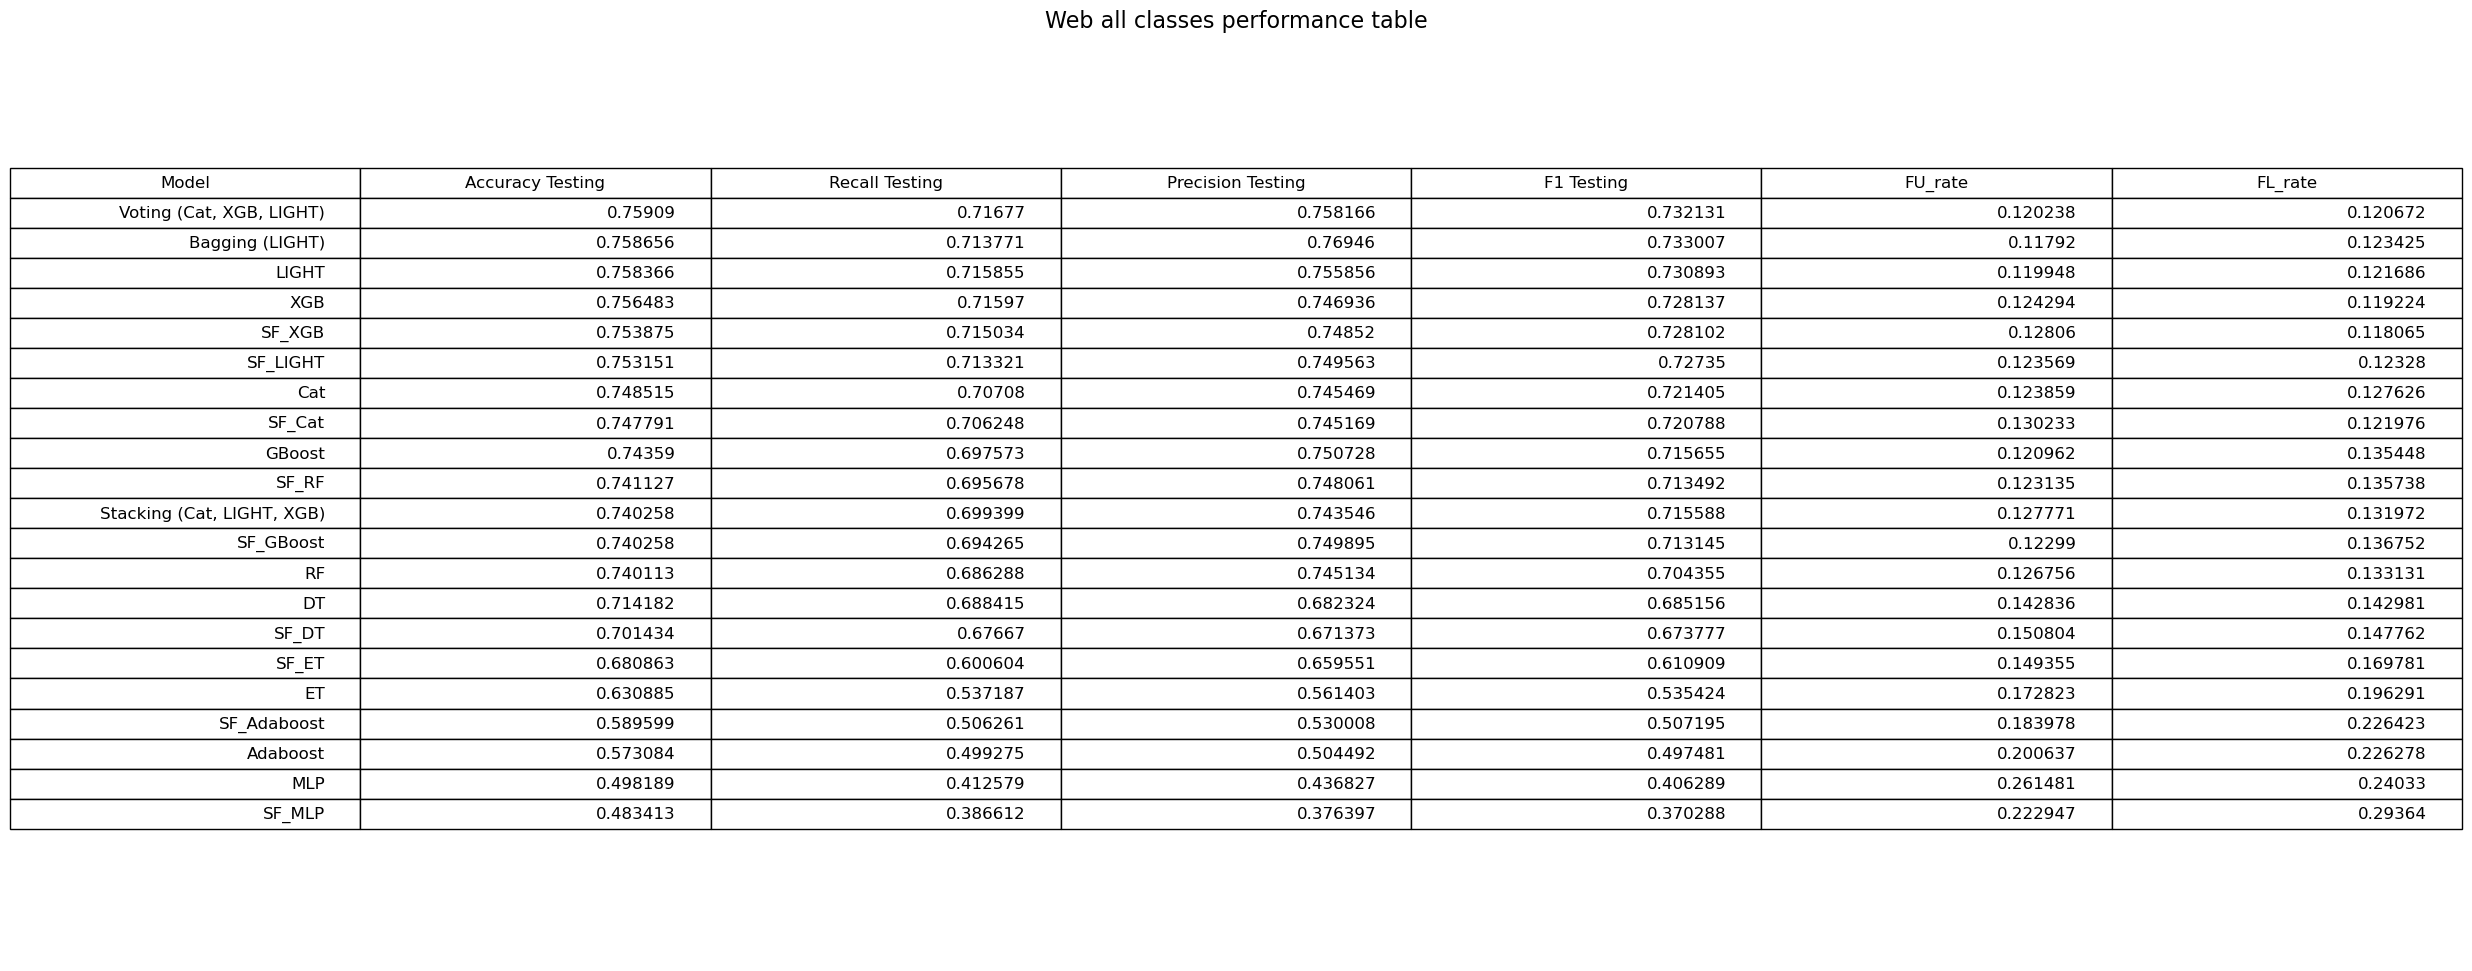

In [10]:
# Performance table
performance_table = read_csv_file(performance_path, model_path_all_classes).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(50)
performance_table = performance_table[['Model', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate']]
performance_table = performance_table.round(6)

plot_performance_table(performance_table, model_path_all_classes+'Performance table.png', 'Web all classes performance table')

## Final Prediction

In [11]:
# Define model and import encoder
model = joblib.load(model_path_all_classes + 'model_XGB.joblib')
encoder = get_encoder(model_path_all_classes, "Please, build binary model(s) first")

# Get binary col to include it into the new df
pred_column = 'Prediction'
binary_col = get_col_in_csv(after_build_csv, model_repo, z_column, pred_column, filter_name, filter=True, verbose=True)

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, [after_build_csv], model_repo, X_columns, y_column=y_column, z_column=pred_column, filter_bool=True, filter_name=filter_name, scale=True, encode=False, scaler=scaler, encoder=encoder)

# Build new dataframe and save it
new_after_build_set[y_column] = y_test
new_after_build_set['Final Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[z_column] = binary_col
new_after_build_set['Prediction'] = z_test
count = len(new_after_build_set[new_after_build_set[y_column] != new_after_build_set['Final Prediction']])
y_pred = encoder.inverse_transform(y_pred)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set),len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows']).head()

res.head()

Dataframe length: 302491.
After reduction dataframe length: 68920.


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


Accuracy   Recall  Precision        F1  Mispredicted count  \
0   0.88372  0.88372   0.847486  0.864784                8014   

   Mispredicted rate  Total rows  
0            0.11628       68920

In [12]:
labelBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] != 'BenignTraffic')
]
FinalBenighTraffic = new_after_build_set[
    (new_after_build_set['label'] != 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]
GoodBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]

del new_after_build_set

In [13]:
print(len(labelBenignTraffic), len(FinalBenighTraffic), len(GoodBenignTraffic))

2896 0 0
